<a href="https://colab.research.google.com/github/adelrio89/data_science_for_public_policy/blob/master/Tarea_2_Gesti%C3%B3n_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tarea 2** (fecha de entrega: 24 de Julio 2021)


Esta tarea consistirá de tres preguntas las cuales deberá responder de forma completa (código, texto e imágenes explicativas). Puede entregar la tarea en el formato, que estime conveniente (doc, pdf, script de R, url de Colab) pero tenga en cuenta que debe adjuntar el código utilizado. Se recomienda el uso de Colab R (recordar dejar el notebook compartido).


En el taller 3 trabajamos con una base de datos de alumnos en el sistema de Educación Superior. La idea de esta tarea es ampliar el modelo de datos, entender como se relacionan las diferentes tablas y, extraer información relevante para generar insights importantes. 

##**Pregunta 1 (1 pt)**

En el taller se elaboró un modelo de datos Entidad - Relación con la matricula de Educación Superior. Complemente este modelo agregando la información del archivo "Rendimiento Escolar del año 2019".


La base de datos se encuentra disponible en http://datos.mineduc.cl/dashboards/19881/informacion-de-rendimiento-academico/.

**Tip 1:** Para elaborar el modelo, debe crear al menos una nueva entidad y  al menos una nueva relacion (junto con sus atributos), y ver como se relacionan con las creadas en el taller.

**Tip 2:** De acuerdo a lo que se vio en el taller, es necesario revisar el esquema de registro (http://datos.mineduc.cl/datasets/191683-er-rendimiento-por-alumno.download/).

**P.d:** Finalmente, en este link puede ver (más no editar) el modelo elaborado en el taller: https://app.creately.com/diagram/h6ZxbP2gf6D/edit


---

[Diagrama Entidad Relación - Lucidchart](https://lucid.app/lucidchart/invitations/accept/inv_4d5a845b-9481-4818-947b-44562a045fb2)


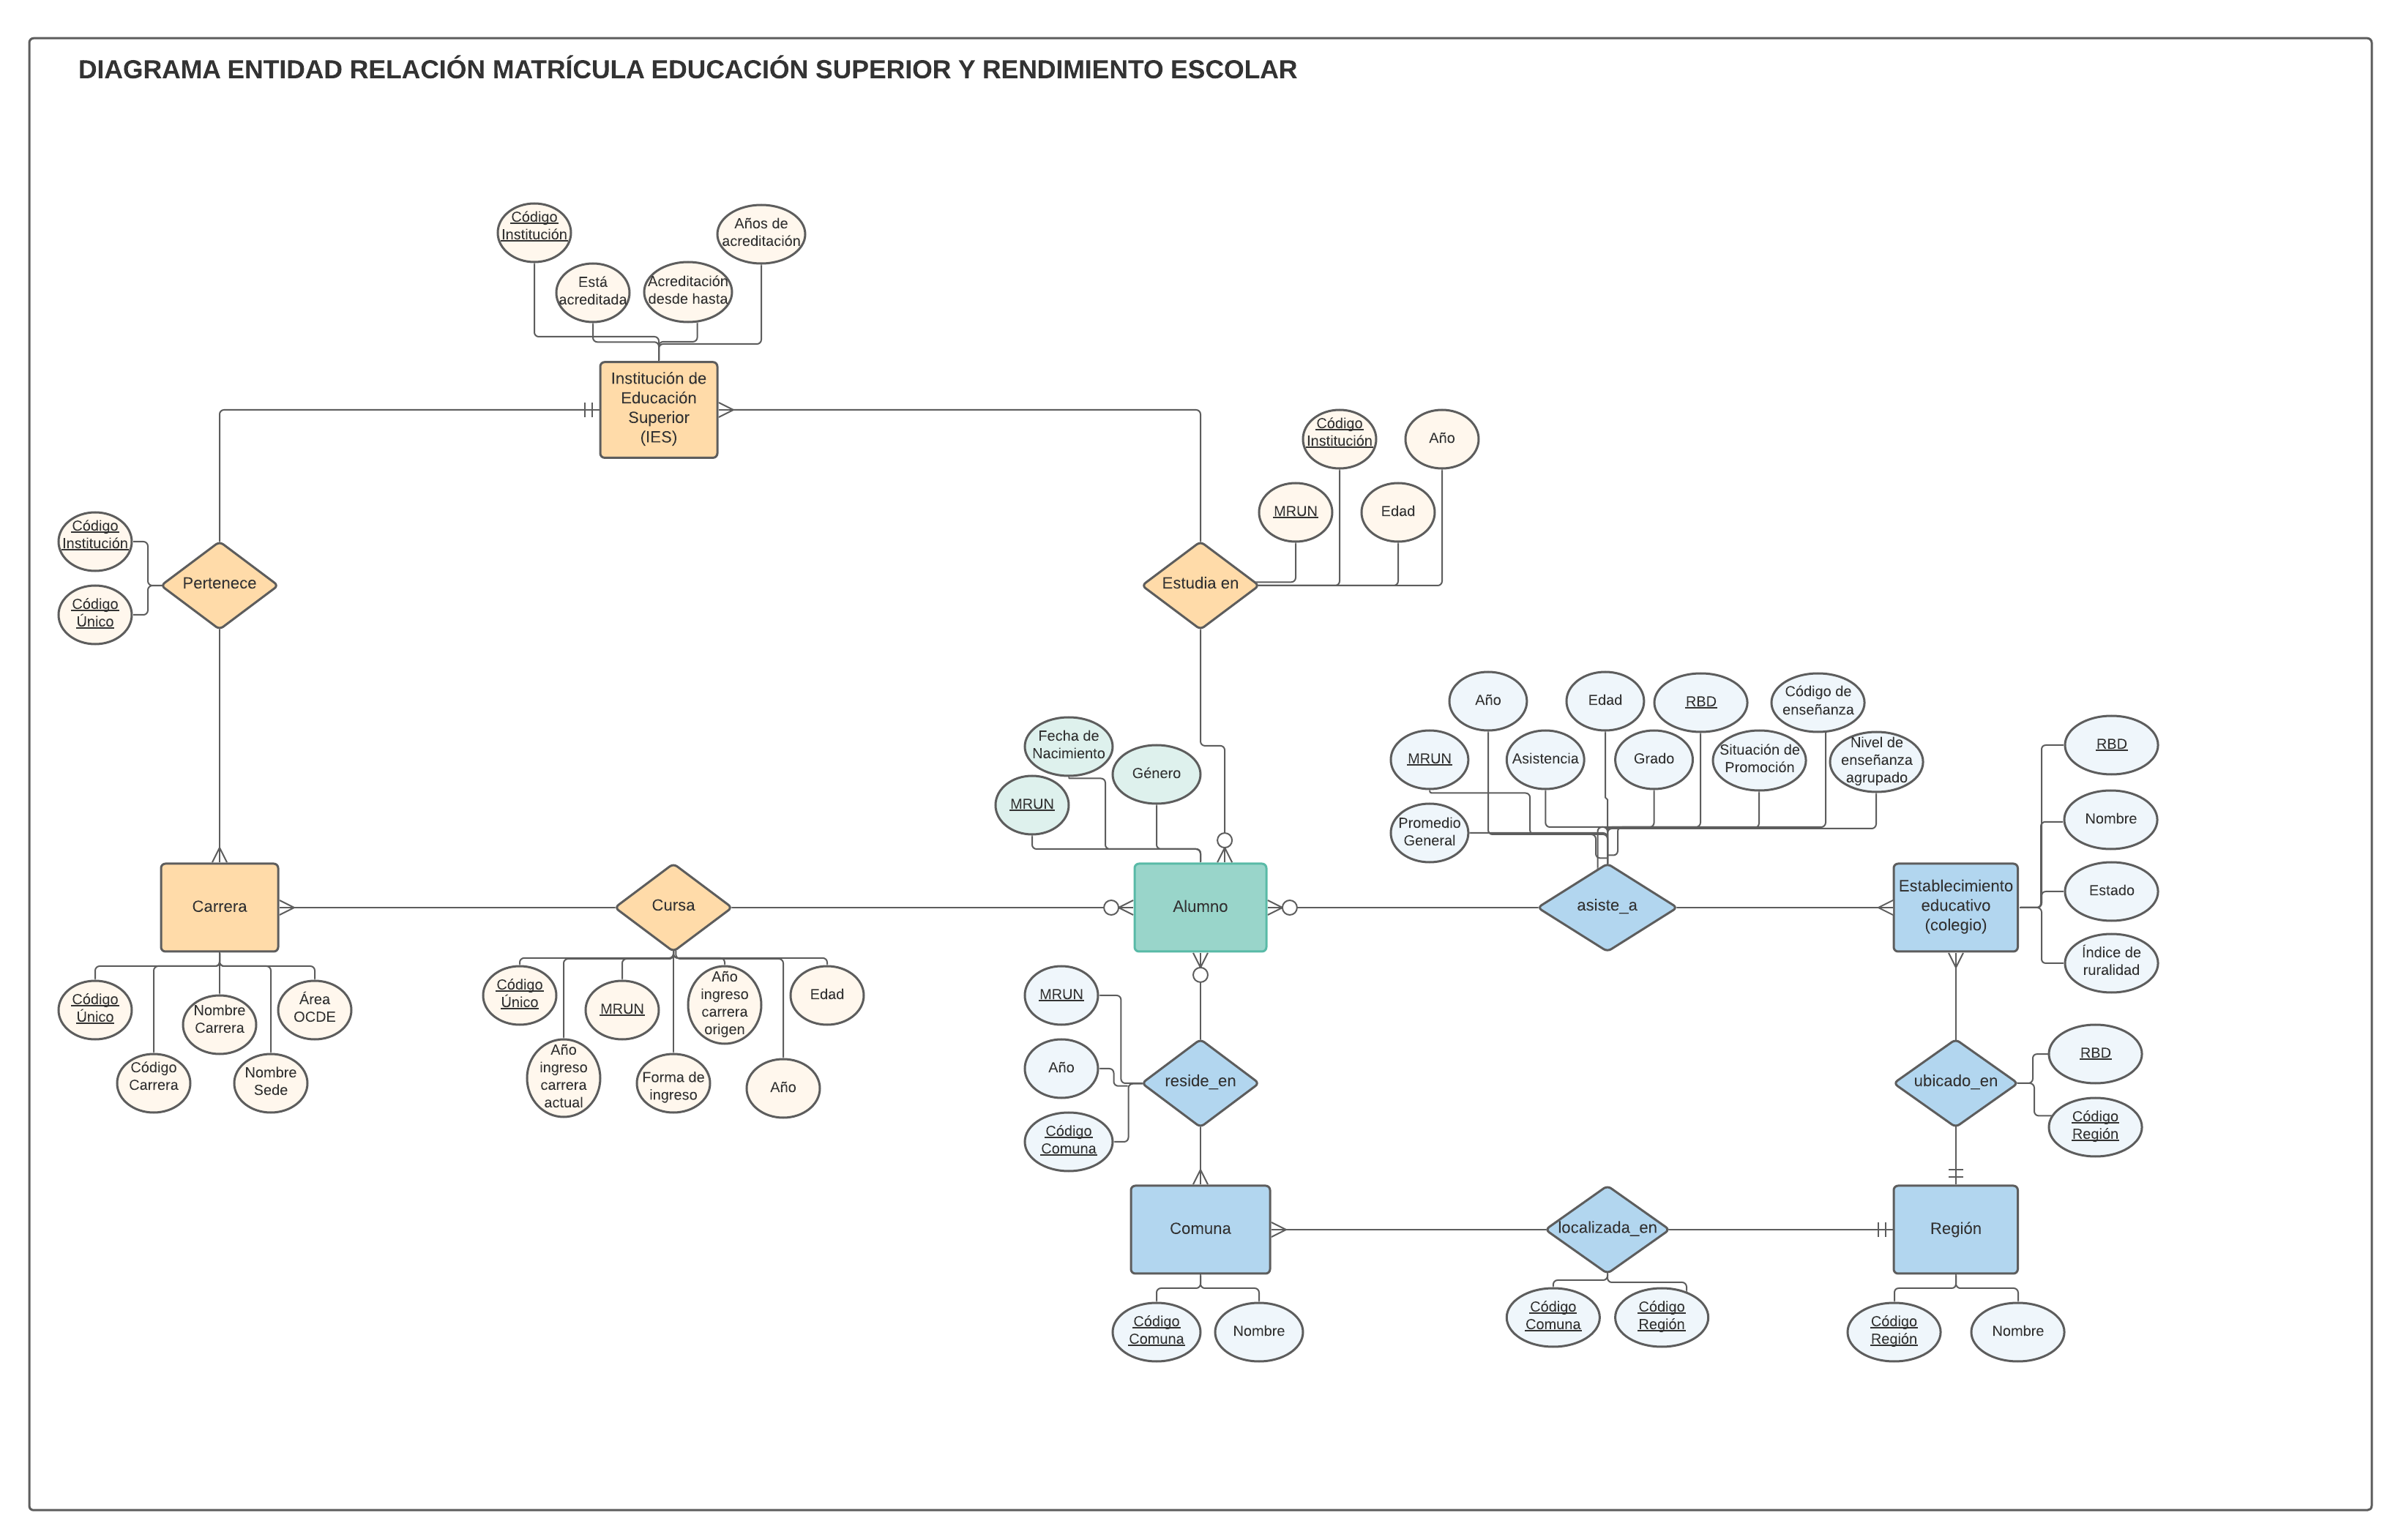

##**Pregunta 2 (2.5 pts)**

Haga un análisis de la calidad de datos de la tabla de Rendimiento 2019. Para ello, determine la completitud, consistencia y validez de sus datos. Si bien puede guiarse por el taller, analisis calcados (con los mismos atributos) del taller no serán considerados como validos

**a)** (1 pts) Calcule la completitud de: las tuplas, los atributos de la tabla y la tabla completa. Además señale aquellos atributos donde haya más errores y detallando en que casos la mayor presencia de datos faltantes es de una menor gravedad. Una vez hecho los calculos describa y presente graficos (de barra, histogramas) para facilitar la explicacion de los resultados.

**b)** (0.7 pts) Desarrolle un analisis de validez para:

*   Una restriccion de rango
*   Una restriccion de unicidad
*   Una restriccion de pertenencia con algun atributo que sea categorico (puede guiarse por el esquema del registro)

Para esto seleccione un atributo de la tabla para cada tipo de restricción, explique por qué eligió y explique sus resultados

**c)** (0.8 pts) Analice la consistencia de 3 atributos con respecto a otros de la misma tabla que entregan una informacion similar.

**Tip:** Puede compararlos de manera similar al taller.



---



In [1]:
system("gdown https://drive.google.com/uc?id=1dCapTadgVjHrH5S0nFlrhIrX9FOtENCK")

In [ ]:
#system("wget http://datos.mineduc.cl/datasets/191801-rendimiento-escolar-ano-2019.download/")
#system("mv /content/index.html /content/rendimiento_2019.zip")


In [2]:
library(tidyverse)
library(data.table)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [23]:
#lista <- unzip("/content/rendimiento_2019.zip")
rendimiento_2019 <- fread("20200220_Rendimiento_2019_20200131_PUBL.csv", na.strings = c("NA", ""))

In [24]:
class(rendimiento_2019)

[1] "data.table" "data.frame"

In [25]:
setDF(rendimiento_2019)
class(rendimiento_2019)

[1] "data.frame"

In [26]:
head(rendimiento_2019)

,AGNO,RBD,DGV_RBD,NOM_RBD,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,COD_COM_RBD,NOM_COM_RBD,COD_DEPROV_RBD,⋯,COD_COM_ALU,NOM_COM_ALU,COD_RAMA,COD_SEC,COD_ESPE,PROM_GRAL,ASISTENCIA,SIT_FIN,SIT_FIN_R,COD_MEN
,<int>,<int>,<int>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<int>,⋯,<int>,<chr>,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<int>
1,2019,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,⋯,15101,ARICA,400,410,41001,5,85,P,P,0
2,2019,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,⋯,15101,ARICA,400,410,41001,0,0,Y,Y,0
3,2019,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,⋯,15101,ARICA,400,410,41001,"4,9",89,R,R,0
4,2019,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,⋯,15101,ARICA,400,410,41001,0,0,Y,Y,0
5,2019,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,⋯,1107,ALTO HOSPICIO,400,410,41001,0,0,Y,T,0
6,2019,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,⋯,13124,PUDAHUEL,400,410,41001,"5,1",89,P,P,0


In [27]:
rendimiento_2019$PROM_GRAL <- as.numeric(gsub(',','.', rendimiento_2019$PROM_GRAL))

In [28]:
head(rendimiento_2019$PROM_GRAL)

[1] 5.0 0.0 4.9 0.0 0.0 5.1

**a) Completitud.**


1.   Completitud de columnas





In [29]:
# total casos NA por columna
casos_na_col <- colSums(is.na(rendimiento_2019))
print(casos_na_col)
# total observaciones
total_casos <- nrow(rendimiento_2019)
print(total_casos)
# total completitud por columnas
completitud_col <- 100-((casos_na_col / total_casos)*100)
print(completitud_col)

          AGNO            RBD        DGV_RBD        NOM_RBD    COD_REG_RBD 
             0              0              0              0              0 
 NOM_REG_RBD_A    COD_PRO_RBD    COD_COM_RBD    NOM_COM_RBD COD_DEPROV_RBD 
             0              0              0              0              0 
NOM_DEPROV_RBD       COD_DEPE      COD_DEPE2      RURAL_RBD   ESTADO_ESTAB 
             0              0              0              0              0 
      COD_ENSE      COD_ENSE2      COD_GRADO        LET_CUR        COD_JOR 
             0              0              0              0              0 
   COD_TIP_CUR    COD_DES_CUR           MRUN        GEN_ALU    FEC_NAC_ALU 
             0              0              0              0              0 
      EDAD_ALU    COD_REG_ALU    COD_COM_ALU    NOM_COM_ALU       COD_RAMA 
           271              0              0            188              0 
       COD_SEC       COD_ESPE      PROM_GRAL     ASISTENCIA        SIT_FIN 
            

In [30]:
# De la manera vista en clase
completitud_col_apply <- apply(is.na(rendimiento_2019), 2, mean)
print(100-(completitud_col_apply*100))

          AGNO            RBD        DGV_RBD        NOM_RBD    COD_REG_RBD 
     100.00000      100.00000      100.00000      100.00000      100.00000 
 NOM_REG_RBD_A    COD_PRO_RBD    COD_COM_RBD    NOM_COM_RBD COD_DEPROV_RBD 
     100.00000      100.00000      100.00000      100.00000      100.00000 
NOM_DEPROV_RBD       COD_DEPE      COD_DEPE2      RURAL_RBD   ESTADO_ESTAB 
     100.00000      100.00000      100.00000      100.00000      100.00000 
      COD_ENSE      COD_ENSE2      COD_GRADO        LET_CUR        COD_JOR 
     100.00000      100.00000      100.00000      100.00000      100.00000 
   COD_TIP_CUR    COD_DES_CUR           MRUN        GEN_ALU    FEC_NAC_ALU 
     100.00000      100.00000      100.00000      100.00000      100.00000 
      EDAD_ALU    COD_REG_ALU    COD_COM_ALU    NOM_COM_ALU       COD_RAMA 
      99.99186      100.00000      100.00000       99.99435      100.00000 
       COD_SEC       COD_ESPE      PROM_GRAL     ASISTENCIA        SIT_FIN 
     100.000

In [60]:
# Función para imprimir detalles de completitud en columna
completitud <- function(columna){

  # Número de casos NA 
  print(sprintf('##### Completitud %s ######', columna))
  casos_na_edad <- sum(is.na(rendimiento_2019 %>% select(all_of(columna))))
  print(paste('Cantidad NA:',casos_na_edad))
  # total casos
  total <- nrow(rendimiento_2019)
  print(paste('Total registros:',total))
  # % de casos NA
  print(paste('% de casos NA:',(casos_na_edad / total)*100))
  # completitud
  print(paste('% Completitud:',100 - (casos_na_edad / total)*100))
  cat("\n")

}

In [61]:
completitud('EDAD_ALU')
completitud('NOM_COM_ALU')
completitud('SIT_FIN')
completitud('SIT_FIN_R')

[1] "##### Completitud EDAD_ALU ######"
[1] "Cantidad NA: 271"
[1] "Total registros: 3328915"
[1] "% de casos NA: 0.00814079061796411"
[1] "% Completitud: 99.991859209382"

[1] "##### Completitud NOM_COM_ALU ######"
[1] "Cantidad NA: 188"
[1] "Total registros: 3328915"
[1] "% de casos NA: 0.00564748574235149"
[1] "% Completitud: 99.9943525142576"

[1] "##### Completitud SIT_FIN ######"
[1] "Cantidad NA: 487"
[1] "Total registros: 3328915"
[1] "% de casos NA: 0.0146293912581126"
[1] "% Completitud: 99.9853706087419"

[1] "##### Completitud SIT_FIN_R ######"
[1] "Cantidad NA: 445"
[1] "Total registros: 3328915"
[1] "% de casos NA: 0.0133677189114171"
[1] "% Completitud: 99.9866322810886"



Todas las columnas tienen una completitud del 100%, excepto 
Edad del alumno (EDAD_ALU - 99.99%), Nombre de la comuna de residencia del alumno (NOM_COM_ALU - 99.99%), Situación final (SIT_FIN - 99.98%), Situación final con traslado (SIT_FIN_R - 99.98%) 






2.   Completitud de filas



In [64]:
# total casos NA por fila
casos_na_filas <- rowSums(is.na(rendimiento_2019))
# filtra las filas que tienen al menos un NA
casos_na_filas <- casos_na_filas[casos_na_filas>0]
print('##### Filas con NA en al menos una columna #####')
print(casos_na_filas)
print(paste('Total filas con NA:',length(casos_na_filas)))

total_casos <- length(rendimiento_2019)
print(paste('Total variables:',total_casos))
# total completitud por filas
completitud_filas <- 100-((casos_na_filas / total_casos)*100)
print('##### % Completitud filas con NA #####')
print(completitud_filas)

[1] "##### Filas con NA en al menos una columna #####"
  [1] 1 1 1 1 1 1 1 2 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1
 [75] 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 2 2 1 1
[112] 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 2 2 1 2 1 2 2 1 1 1 1 2 1 1 1 1 1
[186] 1 1 1 1 2 1 2 1 2 1 1 1 1 2 2 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2
[223] 2 2 2 2 2 2 1 2 2 2 1 2 1 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2
[260] 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2
[297] 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[334] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 1
[371] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2
[408] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1

En su mayoría las filas de la base tienen una completitud del 100%, excepto 907 filas, debido a los NA en las columnas EDAD_ALU, NOM_COM_ALU, SIT_FIN y SIT_FIN_R


3. Completitud de tabla

In [66]:
# total casos NA en la tabla
casos_na_tabla <- sum(is.na(rendimiento_2019))
print(paste('Total celdas NA en la tabla',casos_na_tabla))
# total datos (filas x columnas)
total_casos <- nrow(rendimiento_2019) * length(rendimiento_2019)
print(paste('Total celdas (filas x columnas) en la tabla:',total_casos))
# total completitud de tabla
completitud_tabla <- 100-((casos_na_tabla / total_casos)*100)
print(paste('% Completitud:',completitud_tabla))

[1] "Total celdas NA en la tabla 1391"
[1] "Total celdas (filas x columnas) en la tabla: 123169855"
[1] "% Completitud: 99.9988706652289"


 
* Explorando columnas con NAs


In [90]:
# Edad Alumno (EDAD_ALU)
print('Valores únicos de edad')
sort(unique(rendimiento_2019$EDAD_ALU), na.last = FALSE)
print('Cantidad de registros con edad 0:')
rendimiento_2019 %>% filter(EDAD_ALU == 0) %>% select(MRUN, EDAD_ALU, FEC_NAC_ALU)
print('Cantidad de registros con edad NA:')
rendimiento_2019 %>% filter(is.na(EDAD_ALU)) %>% select(MRUN, EDAD_ALU, FEC_NAC_ALU) %>% head()

[1] "Valores únicos de edad"


[1] NA  0  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
[51] 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
[76] 76 77 78 79 80 81 82 83 84 85 87 88 89 92

[1] "Cantidad de registros con edad 0:"


MRUN,EDAD_ALU,FEC_NAC_ALU
<int>,<int>,<int>
26067581,0,201812


[1] "Cantidad de registros con edad NA:"


,MRUN,EDAD_ALU,FEC_NAC_ALU
,<int>,<int>,<int>
1,25807893,NA,190001
2,25486859,NA,190001
3,25599684,NA,190001
4,25606776,NA,190001
5,26095475,NA,200804
6,25839486,NA,190001


In [99]:
rendimiento_2019 %>% filter(FEC_NAC_ALU == 190001, is.na(EDAD_ALU)) %>% nrow()

[1] 232

In [89]:
# Comuna de residencia de Alumno (NOM_COM_ALU)
print('Valores únicos de comuna')
sort(unique(rendimiento_2019$NOM_COM_ALU), na.last = FALSE)[1:10]
print('Cantidad de registros con comuna NA:')
rendimiento_2019 %>% filter(is.na(NOM_COM_ALU)) %>% select(MRUN, COD_COM_ALU,NOM_COM_ALU) %>% head()

[1] "Valores únicos de comuna"


[1] NA                "ALGARROBO"       "ALHUÉ"           "ALTO BIOBÍO"    
 [5] "ALTO DEL CARMEN" "ALTO HOSPICIO"   "ANCUD"           "ANDACOLLO"      
 [9] "ANGOL"           "ANTÁRTICA"

[1] "Cantidad de registros con comuna NA:"


,MRUN,COD_COM_ALU,NOM_COM_ALU
,<int>,<int>,<chr>
1,26085607,0,NA
2,26085503,0,NA
3,26085528,0,NA
4,26095475,0,NA
5,26095467,0,NA
6,26085482,0,NA


In [93]:
# Situación final (SIT_FIN y SIT_FIN_R)
print('Valores únicos de Situación final')
sort(unique(rendimiento_2019$SIT_FIN), na.last = FALSE)
print('Valores únicos de Situación final con Traslados')
sort(unique(rendimiento_2019$SIT_FIN_R), na.last = FALSE)
print('Cantidad de registros con Situación final NA:')
rendimiento_2019 %>% filter(is.na(SIT_FIN)) %>% select(MRUN, SIT_FIN, SIT_FIN_R) %>% head()

[1] "Valores únicos de Situación final"


[1] NA  "P" "R" "Y"

[1] "Valores únicos de Situación final con Traslados"


[1] NA  "P" "R" "T" "Y"

[1] "Cantidad de registros con Situación final NA:"


,MRUN,SIT_FIN,SIT_FIN_R
,<int>,<chr>,<chr>
1,18790448,NA,T
2,7624123,NA,T
3,3435649,NA,NA
4,157280,NA,NA
5,1547648,NA,NA
6,2849505,NA,NA


In [97]:
rendimiento_2019 %>% filter(is.na(SIT_FIN_R)) %>% select(MRUN, SIT_FIN, SIT_FIN_R, PROM_GRAL, ASISTENCIA, NOM_COM_ALU, NOM_RBD) %>% head()

,MRUN,SIT_FIN,SIT_FIN_R,PROM_GRAL,ASISTENCIA,NOM_COM_ALU,NOM_RBD
,<int>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>
1,3435649,NA,NA,0,0,COELEMU,LICEO DOMINGO ORTIZ DE ROZAS
2,157280,NA,NA,0,0,SAN PEDRO DE LA PAZ,ESCUELA BASICA MICHAIHUE
3,1547648,NA,NA,0,0,SAN PEDRO DE LA PAZ,ESCUELA BASICA MICHAIHUE
4,2849505,NA,NA,0,0,OVALLE,ESCUELA BASICA MICHAIHUE
5,4740672,NA,NA,0,0,SAN PEDRO DE LA PAZ,ESCUELA BASICA MICHAIHUE
6,7960622,NA,NA,0,0,SAN PEDRO DE LA PAZ,ESCUELA BASICA MICHAIHUE



Tras cálculo y exploración de atributos con NAs, es posible establecer que el % de información faltante es en general baja para todas las columnas donde se encuentraron valores NA (menos del 0.02% del total de datos). En orden de mayor a menor proporción de datos faltantes: SIT_FIN, SIT_FIN_R, EDAD_ALU y NOM_COM_ALU.
<br>
Podría decirse que una mayor presencia de datos faltantes en las columnas SIT_FIN y EDAD_ALU son de menor gravedad, debido a que hay otras columnas con las cuales se puede calcular esta información: SIT_FIN_R y FEC_NAC_ALU, respectivamente.
<br>
Pese a lo anterior, de los 271 casos que se encontraron de datos faltantes en la edad del alumno, 232 corresponden con registros en donde la fecha de nacimiento también parece ser un dato faltante, o por lo menos inválido (190001), ya que no puede haber un alumno escolar con año de nacimiento 1900.

4.   Gráficos para explicar completitud


In [116]:
# Debido a que la proporción de datos faltantes es muy pequeña para todas las columnas,
# se muestra solamente el total de NAs por columna. 
na_edad <- sum(is.na(rendimiento_2019$EDAD_ALU))
na_comuna <- sum(is.na(rendimiento_2019$NOM_COM_ALU))
na_sit_fin <- sum(is.na(rendimiento_2019$SIT_FIN))
na_sit_fin_r <- sum(is.na(rendimiento_2019$SIT_FIN_R))
total <- sum(is.na(rendimiento_2019))
variable <- c('Edad Alumno','Comuna Residencia','Situación Final', 'Situación Final con Traslado', 'Todas las Columnas')
valor <- c(na_edad, na_comuna, na_sit_fin, na_sit_fin_r, total)
g_resumen <- data.frame(variable, valor)

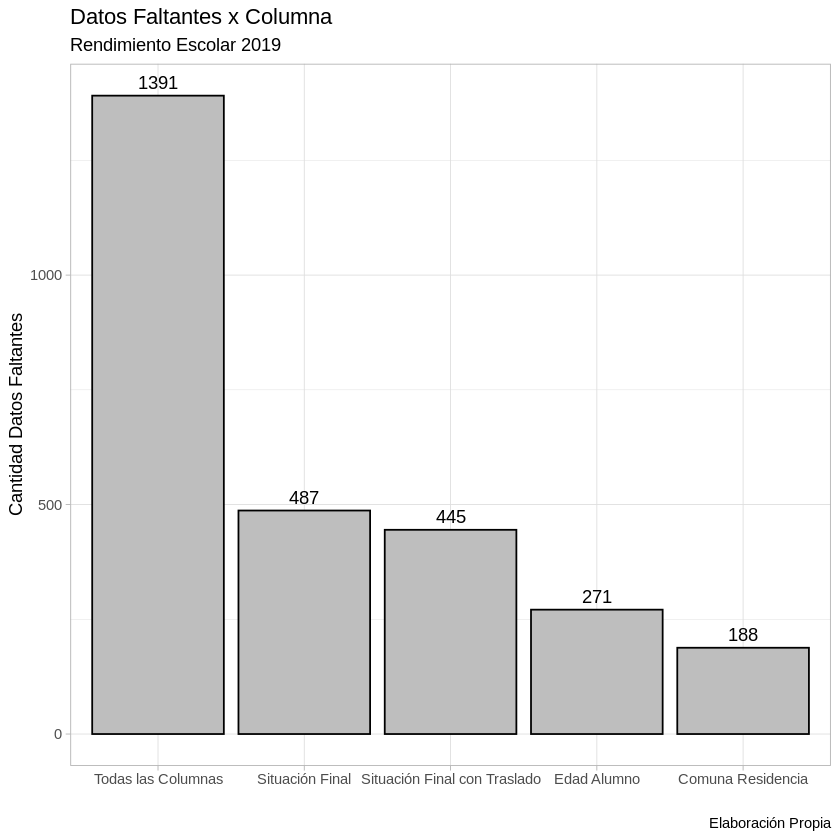

In [136]:
ggplot(g_resumen, aes(x=reorder(variable,-valor), y=valor)) + 
geom_col(fill="gray",color="black") +
geom_text(aes(label=valor),vjust = -0.5) + 
labs(x='',y='Cantidad Datos Faltantes', title='Datos Faltantes x Columna', subtitle='Rendimiento Escolar 2019', caption='Elaboración Propia') + 
theme_light() 

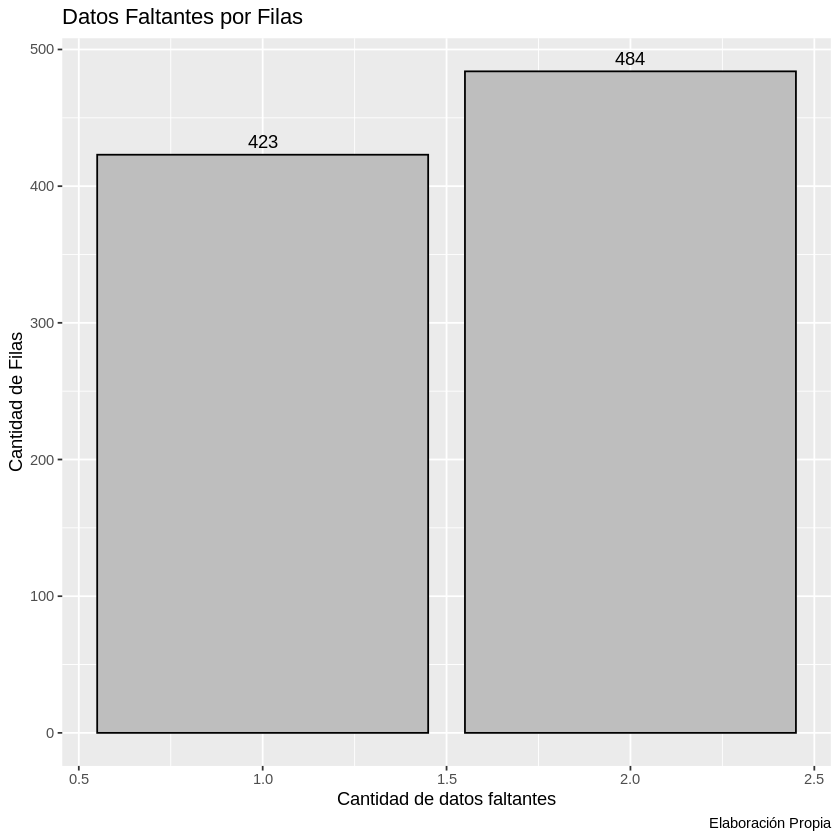

In [139]:
# Datos Faltantes por Fila
rendimiento_2019$na_fila <- apply(is.na(rendimiento_2019), 1, sum) 
g_na_filas <- rendimiento_2019 %>% filter(na_fila > 0) %>% group_by(na_fila) %>% mutate(cant=n()) %>% select(na_fila, cant) %>% distinct()
ggplot(g_na_filas, aes(x=na_fila,y=cant)) +
geom_col(fill="gray",color="black") +
geom_text(aes(label=cant),vjust = -0.5) + 
labs(x='Cantidad de datos faltantes', y='Cantidad de Filas', title='Datos Faltantes por Filas', subtile='Rendimiento Escolar 2019', caption='Elaboración Propia')



**b) Análisis de Validez**

*   Una restriccion de rango. <br>
% anual de asistencia (ASISTENCIA). Se espera que el % de asistencia de los alumnos esté en el rango [0, 100]. 

In [140]:
# valores únicos en la columna ASISTENCIA
print(sort(unique(rendimiento_2019$ASISTENCIA)))

  [1]   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
 [19]  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
 [37]  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
 [55]  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
 [73]  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
 [91]  90  91  92  93  94  95  96  97  98  99 100


El % anual de asistencia es uno de los atributos seleccionados en mi modelo entidad relación. Se confirma que los % anuales de asistencia en la base se encuentran en un rango válido [0, 100]

*   Una restriccion de unicidad <br>
Unicidad de tupla Código de establecimiento (RBD) y Código de la región del establecimiento (COD_REG_RBD). Se espera que cada establecimiento esté localizado en una sola región. En otras palabras, que no hayan registros de un establecimiento en dos regiones distintas.


In [141]:
# número de establecimientos
establec <- rendimiento_2019 %>% select(RBD) %>% distinct()
print(nrow(establec))
# establecimiento (RBD) y región donde se encuentra establecimiento (COD_REG_RBD)
reg_establec <- rendimiento_2019 %>% select(RBD, COD_REG_RBD) %>% distinct() 
print(nrow(reg_establec))

[1] 9114
[1] 9114


Se confirma la unicidad de la tupla de atributos RBD y COD_REG_RBD. Esto es importante porque en el modelo entidad-relación del punto 1 se establecido esta condición de unicidad en la relación "ubicado_en"

*   Una restriccion de pertenencia con algun atributo que sea categorico (puede guiarse por el esquema del registro) <br>
Situación de promoción (SIT_FIN). Se espera que esta columna solamente tenga los valores: P: Promovido, R: Reprobado, Y: Retirado, En blanco: Sin información

In [142]:
# valores únicos en la columna Situación de promoción (SIT_FIN)
unique(rendimiento_2019$SIT_FIN)

[1] "P" "Y" "R" NA

Se confirma pertenencia de valores en atributo categórico, si bien también se identificaron NA en esta columna.

**c) Consistencia**

Situación de promoción al cierre del
año escolar (SIT_FIN) vs Situación de promoción al cierre del
año escolar, con indicador de traslado (SIT_FIN_R)

In [143]:
# Relación en la base entre atributos SIT_FIN y SIT_FIN_R 
rendimiento_2019 %>% select(SIT_FIN, SIT_FIN_R) %>% distinct() 

SIT_FIN,SIT_FIN_R
<chr>,<chr>
P,P
Y,Y
R,R
Y,T
R,T
NA,T
NA,NA


In [144]:
nrow(rendimiento_2019[is.na(rendimiento_2019$SIT_FIN),])

[1] 487

In [145]:
# Relación en la base entre atributos COD_ENSE y COD_ENSE2
rendimiento_2019 %>% select(COD_ENSE, COD_ENSE2) %>% distinct() 

COD_ENSE,COD_ENSE2
<int>,<int>
463,8
510,7
563,8
610,7
663,8
863,8
165,3
167,3
363,6


In [148]:
# Relación entre el código y la comuna de residencia del alumno.
# número de códigos únicos de comunas
rendimiento_2019 %>% select(COD_COM_ALU) %>% distinct() %>% nrow() %>% print()
# número de códigos y nombres de comunas únicos
rendimiento_2019 %>% select(COD_COM_ALU, NOM_COM_ALU) %>% distinct() %>% nrow() %>% print()
# códigos únicos y nombres únicos de comunas en la base
sort(unique(rendimiento_2019$COD_COM_ALU), na.last = FALSE)[0:20]
sort(unique(rendimiento_2019$NOM_COM_ALU), na.last = FALSE)[0:20]

[1] 347
[1] 347


[1]    0 1101 1107 1401 1402 1403 1404 1405 2101 2102 2103 2104 2201 2202 2203
[16] 2301 2302 3101 3102 3103

[1] NA                "ALGARROBO"       "ALHUÉ"           "ALTO BIOBÍO"    
 [5] "ALTO DEL CARMEN" "ALTO HOSPICIO"   "ANCUD"           "ANDACOLLO"      
 [9] "ANGOL"           "ANTÁRTICA"       "ANTOFAGASTA"     "ANTUCO"         
[13] "ARAUCO"          "ARICA"           "AYSÉN"           "BUIN"           
[17] "BULNES"          "CABILDO"         "CABO DE HORNOS"  "CABRERO"

In [149]:
nrow(rendimiento_2019[rendimiento_2019$COD_COM_ALU == 0,])

[1] 188

In [150]:
nrow(rendimiento_2019[is.na(rendimiento_2019$NOM_COM_ALU),])

[1] 188

A partir del análisis de consistencia fue posible detectar valores nulos que no están codificados como NAs en la base; es decir, no responden TRUE a la función is.na().

Los valores vacíos en nombre de comuna de residencia del alumno (NOM_COM_ALU), Situación Final (SIT_FIN) y Situación Final con Translado (SIT_FIN_R). Los valores nulos de comuna se excluirán, pero respecto a la situación, se removerán solo aquellos donde ambos (SIT_FIN y SIT_FIN_R) son nulos. Esto debido a que es normal que SIT_FIN sea nulo cuando SIT_FIN_R es un traslado - 'T'

##**Pregunta 3 (3.5 pts.)**

Finalmente, trabajará con el modelo de datos y unirá la tabla de rendimiento 2019 con la matrícula de educación superior 2020, para realizar un trabajo exhaustivo de análisis. Para esto usted debe usar RSQLite y los comandos para cargar datos, además de realizar consultas mediante el lenguaje SQL.

**a)** (0.7 pts) Limpie ambas tablas, de acuerdo a lo observado en la pregunta 2, y carguelas a la base de datos, continuando lo hecho en el taller y su modelo de datos.

**b)** (0.8 pts) Analice la validez de los datos, para esto escriba la siguiente consulta:

`Obtener todos los MRUN de los alumnos que reprobaron cuarto medio y se matricularon a la universidad.`

¿Qué significa el resultado obtenido?

**c)** (2 pts) Realice 2 consultas a la base de datos que involucren a alguna de las entidades de rendimiento y las de matricula. Explique el objetivo de las consultas, luego presente los resultados graficandolos de manera adecuada y finalice con una pequeña conclusion de su analisis.


In [151]:
install.packages("RSQLite")
library(RSQLite)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bit’, ‘bit64’, ‘plogr’




In [152]:
install.packages("tictoc")
library("tictoc")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




**a) Limpieza y carga de datos en base SQLite.**

*   Modelo de datos Matrícula 2020 (tomado del taller 3)





In [153]:
system("gdown --id 1dXpk0MP6eXcgzfsFT4fnwjchecMwrNmZ")

In [154]:
system("unzip /content/20200706_Matrcula_Ed_Superior_2020_PUBL_MRUN.zip")

In [155]:
matricula <- read.csv2("20200706_Matrícula_Ed_Superior_2020_PUBL_MRUN.csv")

In [156]:
alumnos_mat <- matricula[, c("MRUN", "GEN_ALU", "FEC_NAC_ALU")]
estudia_en <- matricula[,c("MRUN", "cod_inst", "cat_periodo", "rango_edad")] 
cursa <- matricula[,c("MRUN","codigo_unico", "cat_periodo", "rango_edad", "anio_ing_carr_ori", "sem_ing_carr_ori", "anio_ing_carr_act", "sem_ing_carr_act", "forma_ingreso")] 
carrera <- matricula[, c("codigo_unico", "cod_sede", "nomb_sede", "cod_carrera", "nomb_carrera", "modalidad", "jornada", "version", "tipo_plan_carr", "dur_estudio_carr", "dur_proceso_tit", "dur_total_carr", "region_sede", "provincia_sede", "comuna_sede", "nivel_global", "nivel_carrera_1", "nivel_carrera_2", "requisito_ingreso",  "vigencia_carrera", "valor_matricula", "valor_arancel", "codigo_demre", "area_conocimiento", "oecd_area",  "oecd_subarea", "area_carrera_generica", "acreditada_carr", "costo_proceso_titulacion",  "costo_obtencion_titulo_diploma" )]
IES <- matricula[, c("cod_inst","tipo_inst_1", "tipo_inst_2", "tipo_inst_3", "nomb_inst", "acreditada_inst", "acre_inst_desde_hasta", "acre_inst_anio")]
pertenece_a <- matricula[,c( "codigo_unico","cod_inst")]

In [157]:
# Limpiar eliminando llaves vacíos
alumnos_mat <- alumnos_mat[!is.na(alumnos_mat$MRUN), ]
cursa <- cursa[!is.na(cursa$MRUN), ]
estudia_en <- estudia_en[!is.na(estudia_en$MRUN), ]

In [158]:
#Eliminamos información repetida
alumnos_mat <- unique(alumnos_mat)
carrera <- unique(carrera)
IES <- unique(IES)

estudia_en <- unique(estudia_en)
cursa <- unique(cursa)
pertenece_a <- unique(pertenece_a)

In [159]:
conn <- dbConnect(RSQLite::SQLite(), "mineduc.db")

In [160]:
dbWriteTable(conn , name = "IES", 
                  value = IES,
                  row.names = FALSE, overwrite = TRUE )
dbWriteTable(conn , name = "carrera", 
                  value = carrera,
                  row.names = FALSE, overwrite = TRUE)
dbWriteTable(conn , name = "estudia_en", 
                  value = estudia_en,
                  row.names = FALSE, overwrite = TRUE)
dbWriteTable(conn , name = "pertenece_a", 
                  value = pertenece_a,
                  row.names = FALSE, overwrite = TRUE)
dbWriteTable(conn , name = "cursa", 
                  value = cursa,
                  row.names = FALSE, overwrite = TRUE)

*   Modelo de datos Rendimiento Escolar 2019

In [176]:
# Quitar filas con NAs en Edad alumno
rendimiento_sin_na <- rendimiento_2019 %>% filter(!is.na(EDAD_ALU))

In [179]:
# Quitar filas con NAs en Nombre comuna
rendimiento_sin_na <- rendimiento_sin_na %>% filter(!is.na(NOM_COM_ALU))

In [182]:
# Quitar filas con NAs en Situación Final, solamente cuando Situación Final con Traslado
# también tenga NA
rendimiento_sin_na <- rendimiento_sin_na %>% filter(!(is.na(SIT_FIN) & is.na(SIT_FIN_R)))

In [186]:
nrow(rendimiento_2019) - nrow(rendimiento_sin_na)

[1] 865

In [187]:
colnames(rendimiento_2019)

[1] "AGNO"           "RBD"            "DGV_RBD"        "NOM_RBD"       
 [5] "COD_REG_RBD"    "NOM_REG_RBD_A"  "COD_PRO_RBD"    "COD_COM_RBD"   
 [9] "NOM_COM_RBD"    "COD_DEPROV_RBD" "NOM_DEPROV_RBD" "COD_DEPE"      
[13] "COD_DEPE2"      "RURAL_RBD"      "ESTADO_ESTAB"   "COD_ENSE"      
[17] "COD_ENSE2"      "COD_GRADO"      "LET_CUR"        "COD_JOR"       
[21] "COD_TIP_CUR"    "COD_DES_CUR"    "MRUN"           "GEN_ALU"       
[25] "FEC_NAC_ALU"    "EDAD_ALU"       "COD_REG_ALU"    "COD_COM_ALU"   
[29] "NOM_COM_ALU"    "COD_RAMA"       "COD_SEC"        "COD_ESPE"      
[33] "PROM_GRAL"      "ASISTENCIA"     "SIT_FIN"        "SIT_FIN_R"     
[37] "COD_MEN"        "na_fila"

In [188]:
# Entidades
alumnos_ren <- rendimiento_sin_na[, c("MRUN", "GEN_ALU", "FEC_NAC_ALU")]
colegios <- rendimiento_sin_na[,c('RBD','NOM_RBD', 'ESTADO_ESTAB', 'RURAL_RBD', 'COD_DEPE2')]
comunas <- rendimiento_sin_na[,c('COD_COM_ALU', 'NOM_COM_ALU')]
regiones <- rendimiento_sin_na[,c('COD_REG_RBD', 'NOM_REG_RBD_A')]

In [189]:
# Relaciones
# 'FEC_ING_ALU' no está en la base de rendimiento, pero sí en la documentación
asiste_a <- rendimiento_sin_na[,c('MRUN','RBD','AGNO','PROM_GRAL','ASISTENCIA','EDAD_ALU','SIT_FIN','SIT_FIN_R','COD_GRADO', 'COD_ENSE', 'COD_ENSE2')]
reside_en <- rendimiento_sin_na[,c('MRUN','AGNO','COD_COM_ALU')]
localizada_en <- rendimiento_sin_na[,c('COD_COM_ALU','COD_REG_ALU')]
ubicado_en <- rendimiento_sin_na[,c('RBD','COD_REG_RBD')]

In [190]:
# Quitar filas duplicadas
alumnos_ren <- unique(alumnos_ren)
colegios <- unique(colegios)
comunas <- unique(comunas)
regiones <- unique(regiones)

asiste_a <- unique(asiste_a)
reside_en <- unique(reside_en)
localizada_en <- unique(localizada_en)
ubicado_en <- unique(ubicado_en)

In [191]:
# Unir datos generales de alumnos de la base de matrícula y alumnos de la base de rendimiento
alumnos <- union(alumnos_mat, alumnos_ren)

In [192]:
# Carga de tablas en SQLite
dbWriteTable(conn , name = "alumnos", 
                  value = alumnos,
                  row.names = FALSE, overwrite = TRUE )
dbWriteTable(conn , name = "colegios", 
                  value = colegios,
                  row.names = FALSE, overwrite = TRUE )
dbWriteTable(conn , name = "comunas", 
                  value = comunas,
                  row.names = FALSE, overwrite = TRUE )
dbWriteTable(conn , name = "regiones", 
                  value = regiones,
                  row.names = FALSE, overwrite = TRUE)
dbWriteTable(conn , name = "asiste_a", 
                  value = asiste_a,
                  row.names = FALSE, overwrite = TRUE)
dbWriteTable(conn , name = "reside_en", 
                  value = reside_en,
                  row.names = FALSE, overwrite = TRUE)
dbWriteTable(conn , name = "localizada_en", 
                  value = localizada_en,
                  row.names = FALSE, overwrite = TRUE)
dbWriteTable(conn , name = "ubicado_en", 
                  value = ubicado_en,
                  row.names = FALSE, overwrite = TRUE)

In [193]:
dbListTables(conn)

[1] "IES"           "alumnos"       "asiste_a"      "carrera"      
 [5] "colegios"      "comunas"       "cursa"         "estudia_en"   
 [9] "localizada_en" "pertenece_a"   "regiones"      "reside_en"    
[13] "ubicado_en"

**b) Análisis de validez de los datos** <br>
Obtener todos los MRUN de los alumnos que reprobaron cuarto medio y se matricularon a la universidad.



In [194]:
nrow(alumnos)

[1] 4202700

In [195]:
# cantidad de alumnos que reprobaron cuarto medio en 2019
dbGetQuery(conn,'
select 
count(distinct asiste_a.MRUN)
from asiste_a 
join colegios on colegios.RBD = asiste_a.RBD
where asiste_a.SIT_FIN = "R"
and asiste_a.COD_ENSE2 in (5,6,7,8)
and asiste_a.COD_GRADO = 4
and colegios.ESTADO_ESTAB = 1;')

count(distinct asiste_a.MRUN)
<int>
1919


In [196]:
# verificación de consulta anterior usando base rendimiento 2019 completa
rendimiento_2019 %>% 
filter(!is.na(rendimiento_2019$EDAD_ALU)) %>%
filter(ESTADO_ESTAB == 1) %>% 
filter(COD_ENSE2 >=5 & COD_ENSE2 <=8) %>% 
filter(COD_GRADO == 4) %>% 
filter(SIT_FIN == 'R') %>% distinct() %>% count()

n
<int>
1919


In [197]:
# Alumnos que reprobaron 4to medio en 2019 y se matricularon en una IES en 2020 
dbGetQuery(conn,'
select
estudia_en.MRUN
from estudia_en
join
(select 
distinct asiste_a.MRUN as MRUN
from asiste_a 
join colegios on colegios.RBD = asiste_a.RBD
where asiste_a.SIT_FIN = "R"
and asiste_a.COD_ENSE2 in (5,6,7,8)
and asiste_a.COD_GRADO = 4
and colegios.ESTADO_ESTAB = 1) repr on repr.MRUN = estudia_en.MRUN;')

MRUN
<int>
10470989
10780617
14869875
22714910


Se encontraron cuatro alumnos que habiendo reprobado 4to medio en 2019, se matricularon en una IES en 2020, lo cual no es válido. <br>
Siguen verificaciones en la base completa de los casos encontrados.

In [198]:
rendimiento_2019 %>% 
filter(MRUN == '10470989' | MRUN == '10780617' | MRUN == '14869875' | MRUN == '22714910') 

AGNO,RBD,DGV_RBD,NOM_RBD,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,COD_COM_RBD,NOM_COM_RBD,COD_DEPROV_RBD,⋯,NOM_COM_ALU,COD_RAMA,COD_SEC,COD_ESPE,PROM_GRAL,ASISTENCIA,SIT_FIN,SIT_FIN_R,COD_MEN,na_fila
<int>,<int>,<int>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<int>,⋯,<chr>,<int>,<int>,<int>,<dbl>,<int>,<chr>,<chr>,<int>,<int>
2019,8748,3,COLEGIO INSTITUTO ALONSO DE ERCILLA,13,RM,131,13101,SANTIAGO,131,⋯,PROVIDENCIA,0,0,0,6.9,56,R,R,0,0
2019,10900,2,COLEGIO LIRIMA,1,TPCA,11,1101,IQUIQUE,11,⋯,IQUIQUE,0,0,0,5.2,77,R,R,0,0
2019,14379,0,COLEGIO INTERNACIONAL SEK DEL PACIFICO,5,VALPO,51,5103,CONCÓN,53,⋯,QUILPUÉ,0,0,0,5.3,84,R,R,0,0
2019,15774,0,ESCUELA AGRICOLA DON GREGORIO,6,LGBO,63,6303,CHIMBARONGO,62,⋯,RANCAGUA,700,720,72007,5.9,32,R,R,72007003,0


In [199]:
matricula %>% 
filter(MRUN == '10470989' | MRUN == '10780617' | MRUN == '14869875' | MRUN == '22714910') 

cat_periodo,codigo_unico,MRUN,GEN_ALU,FEC_NAC_ALU,rango_edad,anio_ing_carr_ori,sem_ing_carr_ori,anio_ing_carr_act,sem_ing_carr_act,⋯,oecd_area,oecd_subarea,area_carrera_generica,acreditada_carr,acreditada_inst,acre_inst_desde_hasta,acre_inst_anio,costo_proceso_titulacion,costo_obtencion_titulo_diploma,forma_ingreso
<int>,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>
2020,I23S2C353J1V1,10470989,1,200108,15 a 19 años,2020,1,2020,1,⋯,"Ingeniería, Industria y Construcción",Ingeniería y Profesiones Afines,Bachillerato y/o Licenciatura en Tecnología,NO ACREDITADA,ACREDITADA,18/11/2015 AL 18/11/2020,5,0,0,1- Ingreso Directo (regular)
2020,I123S3C35J1V1,10780617,2,200204,15 a 19 años,2020,1,2020,1,⋯,Servicios,Servicios Personales,Técnico en Gastronomía y Cocina,NO ACREDITADA,ACREDITADA,13/03/2019 AL 13/03/2021,2,453000,0,1- Ingreso Directo (regular)
2020,I20S3C14J1V1,14869875,1,200010,15 a 19 años,2020,1,2020,1,⋯,Ciencias,Ciencias Físicas,Bachillerato y/o Licenciatura en Ciencias,NO ACREDITADA,ACREDITADA,24/12/2017 AL 24/12/2022,5,0,56580,10- Otras formas de Ingreso
2020,I81S1C14J1V1,22714910,2,200201,15 a 19 años,2020,1,2020,1,⋯,"Ciencias Sociales, Enseñanza Comercial y Derecho",Enseñanza Comercial y Administración,Ingeniería Comercial,NO ACREDITADA,ACREDITADA,21/12/2017 AL 21/12/2021,4,156290,294980,1- Ingreso Directo (regular)


**c) Miniestudio.** (2 pts) Realice 2 consultas a la base de datos que involucren a alguna de las entidades de rendimiento y las de matricula. Explique el objetivo de las consultas, luego presente los resultados graficandolos de manera adecuada y finalice con una pequeña conclusion de su analisis.


El objetivo de las consultas es entender mejor el origen (en términos de comunas y tipo de establecimientos) y destino (tipo de IES) de los alumnos aprobados en 4to medio en la base de Rendimiento 2019 que a su vez se encuentran en la base de Matrícula de Educación Superior 2020.
<br>
Las consultas son:
* Calcular la proporción de alumnos(as) matriculados(as) en 2020 respecto de los alumnos(as) aprobados(as) en 4to medio en 2019.
* Promedios por origen (comuna y tipo de establecimiento) de los(as) alumnos(as) que aprobaron 4to medio en 2019 y se matricularon en 2020 en una IES.
* Promedios por destino (tipo de IES) de los(as) alumnos(as) que aprobaron 4to medio en 2019 y se matricularon en 2020 en una IES.


* ***Limpieza***. Luego de realizar un análisis exploratorio del modelo de datos combinado, se detectaron registros en la tabla de alumnos (alumnos provenientes de la base de rendimiento unidos con alumnos de la base de matrícula) con MRUN igual, pero distinto Género y/o Fecha de Nacimiento. Debido a la proporción pequeña de estos registros (114 / 4203277), se decidió eliminar los registros de la base SQLite, no así de los dataframes para poder verificar lo indicado.

In [200]:
# Comparación alumnos de rendimiento y matrícula
# Alumnos con mismo MRUN (y distinto Género y/o Fecha de Nacimiento), lo cual
# es inconsistente.
dbGetQuery(conn,'
SELECT 
  MRUN
FROM alumnos
GROUP BY MRUN
HAVING COUNT(*) > 1;')

MRUN
<int>
341608
753918
1323146
1675722
1878371
1942824
3326575
3451460
5113703


In [201]:
# Siguen algunos ejemplos de lo detectado, consultando directamente los 
# data.frames
rendimiento_2019 %>% filter(MRUN == 341608) %>% select(MRUN, GEN_ALU, FEC_NAC_ALU)
matricula %>% filter(MRUN == 341608) %>% select(MRUN, GEN_ALU, FEC_NAC_ALU)

matricula %>% select(MRUN, GEN_ALU, FEC_NAC_ALU) %>% filter(MRUN == 3326575)
rendimiento_2019 %>% select(MRUN, GEN_ALU, FEC_NAC_ALU) %>% filter(MRUN == 3326575)

MRUN,GEN_ALU,FEC_NAC_ALU
<int>,<int>,<int>


MRUN,GEN_ALU,FEC_NAC_ALU
<int>,<int>,<int>
341608,2,199908
341608,1,197004


MRUN,GEN_ALU,FEC_NAC_ALU
<int>,<int>,<int>
3326575,1,200202


MRUN,GEN_ALU,FEC_NAC_ALU
<int>,<int>,<int>
3326575,2,200202


In [202]:
# Cantidad de alumnos antes de eliminar los registros inconsistentes
dbGetQuery(conn, '
SELECT COUNT(*) FROM alumnos;')

COUNT(*)
<int>
4202700


In [203]:
# Registros eliminados de la tabla alumnos en la base SQLite
dbExecute(conn,'
DELETE FROM alumnos WHERE MRUN IN
(SELECT 
MRUN
FROM alumnos
GROUP BY MRUN
HAVING COUNT(*) > 1);')

[1] 114

In [204]:
# Cantidad de alumnos después de eliminar los registros inconsistentes
dbGetQuery(conn, '
SELECT COUNT(*) FROM alumnos;')

COUNT(*)
<int>
4202586



* **Consultas SQL del Miniestudio**




In [205]:
# Alumnos escolares en base Rendimiento 2019 que aprobaron 4to medio.
tic()
dbGetQuery(conn,'
SELECT 
  COUNT(DISTINCT asiste_a.MRUN) as Cant
FROM asiste_a 
JOIN colegios ON colegios.RBD = asiste_a.RBD
JOIN alumnos ON alumnos.MRUN = asiste_a.MRUN
WHERE asiste_a.SIT_FIN = "P"
AND asiste_a.COD_ENSE2 in (5,6,7,8)
AND asiste_a.COD_GRADO = 4
AND colegios.ESTADO_ESTAB = 1;')
toc()

Cant
<int>
198330


21.145 sec elapsed


In [206]:
# Alumnos escolares en base Rendimiento 2019 que aprobaron 4to medio, por género.
tic()
dbGetQuery(conn,'
SELECT 
  DISTINCT
  alumnos.GEN_ALU,
  COUNT(alumnos.MRUN) OVER(PARTITION BY alumnos.GEN_ALU) Cant
FROM asiste_a 
JOIN colegios ON colegios.RBD = asiste_a.RBD
JOIN alumnos ON alumnos.MRUN = asiste_a.MRUN
WHERE asiste_a.SIT_FIN = "P"
AND asiste_a.COD_ENSE2 in (5,6,7,8)
AND asiste_a.COD_GRADO = 4
AND colegios.ESTADO_ESTAB = 1;')
toc()

GEN_ALU,Cant
<int>,<int>
1,96276
2,102054


21.115 sec elapsed


In [207]:
# Proporción de alumnos en base Matrículas 2020 que aprobaron 4to medio en base 
# Rendimiento 2019
tic()
matri2020_aprob2019 <- dbGetQuery(conn,'
SELECT
  COUNT(distinct aprob.MRUN) as Total_Aprob,
  COUNT(distinct cursa.MRUN) as Total_Matri,
  ROUND(COUNT(distinct cursa.MRUN)*100.0 / COUNT(distinct aprob.MRUN), 2) as Porc
FROM 
  (select 
  distinct alumnos.MRUN
  from asiste_a 
  join colegios on colegios.RBD = asiste_a.RBD
  join alumnos on alumnos.MRUN = asiste_a.MRUN
  where asiste_a.SIT_FIN = "P"
  and asiste_a.COD_ENSE2 in (5,6,7,8)
  and asiste_a.COD_GRADO = 4
  and colegios.ESTADO_ESTAB = 1) aprob
LEFT JOIN cursa ON cursa.MRUN = aprob.MRUN;')
matri2020_aprob2019
toc()

Total_Aprob,Total_Matri,Porc
<int>,<int>,<dbl>
198330,106416,53.66


24.514 sec elapsed


In [208]:
# Alumnos en base Matrículas 2020 que aprobaron 4to medio en base Rendimiento 
# 2019, por comuna de residencia
tic()
alumnos_por_comuna <- dbGetQuery(conn,'
SELECT
  DISTINCT
  aprob.NOM_COM_ALU,
  COUNT(distinct aprob.MRUN) Cant_Apro,
  COUNT(distinct cursa.MRUN) Cant_Matr,
  AVG(aprob.PROM_GRAL) Prom_Apro,
  AVG(aprob.ASISTENCIA) Asis_Apro
FROM 
  (SELECT 
  DISTINCT alumnos.MRUN,
  comunas.COD_COM_ALU,
  comunas.NOM_COM_ALU,
  asiste_a.PROM_GRAL,
  asiste_a.ASISTENCIA
  FROM asiste_a 
  JOIN colegios ON colegios.RBD = asiste_a.RBD
  JOIN alumnos ON alumnos.MRUN = asiste_a.MRUN
  JOIN reside_en ON reside_en.MRUN = alumnos.MRUN
  JOIN comunas ON comunas.COD_COM_ALU = reside_en.COD_COM_ALU
  WHERE asiste_a.SIT_FIN = "P"
  AND asiste_a.COD_ENSE2 in (5,6,7,8)
  AND asiste_a.COD_GRADO = 4
  AND colegios.ESTADO_ESTAB = 1) aprob
LEFT JOIN cursa ON cursa.MRUN = aprob.MRUN
GROUP BY aprob.NOM_COM_ALU
ORDER BY 2;')
nrow(alumnos_por_comuna)
head(alumnos_por_comuna,10)
toc()

[1] 343

,NOM_COM_ALU,Cant_Apro,Cant_Matr,Prom_Apro,Asis_Apro
,<chr>,<int>,<int>,<dbl>,<dbl>
1,LAGUNA BLANCA,2,1,5.600000,93.00000
2,OLLAGÜE,2,1,5.800000,92.50000
3,RÍO VERDE,2,1,6.200000,98.00000
4,CAMARONES,3,2,5.866667,89.33333
5,SAN GREGORIO,3,1,5.600000,91.33333
6,PRIMAVERA,5,3,5.540000,92.80000
7,GENERAL LAGOS,6,3,6.116667,92.16667
8,O'HIGGINS,6,6,5.933333,94.00000
9,LAGO VERDE,7,5,5.500000,86.71429


40.424 sec elapsed


In [209]:
# Alumnos en base Matrículas 2020 que aprobaron 4to medio en base Rendimiento
# 2019, por tipo de colegio
tic()
alumnos_por_tipo_colegio <- dbGetQuery(conn,'
SELECT
  DISTINCT
  aprob.COD_DEPE2,
  COUNT(distinct aprob.MRUN) Cant_Apro,
  COUNT(distinct cursa.MRUN) Cant_Matr,
  AVG(aprob.PROM_GRAL) Prom_Apro,
  AVG(aprob.ASISTENCIA) Asis_Apro
FROM 
  (SELECT 
  DISTINCT alumnos.MRUN,
  colegios.COD_DEPE2,
  asiste_a.PROM_GRAL,
  asiste_a.ASISTENCIA
  FROM asiste_a 
  JOIN colegios ON colegios.RBD = asiste_a.RBD
  JOIN alumnos ON alumnos.MRUN = asiste_a.MRUN
  JOIN reside_en ON reside_en.MRUN = alumnos.MRUN
  JOIN comunas ON comunas.COD_COM_ALU = reside_en.COD_COM_ALU
  WHERE asiste_a.SIT_FIN = "P"
  AND asiste_a.COD_ENSE2 in (5,6,7,8)
  AND asiste_a.COD_GRADO = 4
  AND colegios.ESTADO_ESTAB = 1) aprob
LEFT JOIN cursa ON cursa.MRUN = aprob.MRUN
GROUP BY aprob.COD_DEPE2
ORDER BY 2;')
alumnos_por_tipo_colegio
toc()

COD_DEPE2,Cant_Apro,Cant_Matr,Prom_Apro,Asis_Apro
<int>,<int>,<int>,<dbl>,<dbl>
5,5486,2633,5.765567,89.61815
4,9636,4246,5.701410,89.64500
3,20510,15077,6.231634,92.07081
1,63217,30210,5.811233,89.61911
2,99481,54250,5.836805,91.57540


39.716 sec elapsed


In [210]:
# Alumnos en base Matrículas 2020 que aprobaron 4to medio en base Rendimiento
# 2019, por tipo de IES. Aquellos que no se matricularon se muestran como NA
tic()
alumnos_por_tipo_ies <- dbGetQuery(conn,'
SELECT
  DISTINCT
  IES.tipo_inst_1,
  COUNT(distinct aprob.MRUN) Cant_Apro,
  COUNT(distinct estudia_en.MRUN) Cant_Matr,
  AVG(aprob.PROM_GRAL) Prom_Apro,
  AVG(aprob.ASISTENCIA) Asis_Apro
FROM 
  (SELECT 
  DISTINCT alumnos.MRUN,
  comunas.COD_COM_ALU,
  comunas.NOM_COM_ALU,
  asiste_a.PROM_GRAL,
  asiste_a.ASISTENCIA
  FROM asiste_a 
  JOIN colegios ON colegios.RBD = asiste_a.RBD
  JOIN alumnos ON alumnos.MRUN = asiste_a.MRUN
  JOIN reside_en ON reside_en.MRUN = alumnos.MRUN
  JOIN comunas ON comunas.COD_COM_ALU = reside_en.COD_COM_ALU
  WHERE asiste_a.SIT_FIN = "P"
  AND asiste_a.COD_ENSE2 in (5,6,7,8)
  AND asiste_a.COD_GRADO = 4
  AND colegios.ESTADO_ESTAB = 1) aprob
LEFT JOIN estudia_en ON estudia_en.MRUN = aprob.MRUN
LEFT JOIN IES on IES.cod_inst = estudia_en.cod_inst
GROUP BY IES.tipo_inst_1
ORDER BY 2;')
alumnos_por_tipo_ies
toc()

tipo_inst_1,Cant_Apro,Cant_Matr,Prom_Apro,Asis_Apro
<chr>,<int>,<int>,<dbl>,<dbl>
Centros de Formación Técnica,14256,14256,5.683644,91.40139
Institutos Profesionales,25670,25670,5.699790,91.09160
Universidades,66587,66587,6.182628,92.66173
NA,91914,0,5.703876,89.40821


40.94 sec elapsed



* **Gráficos**



In [211]:
install.packages("ggpubr")
library(ggpubr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’




In [212]:
# Transformar data.frame con cantidad de alumnos aprobados 4to medio en base
# Rendimiento 2019 y alumnos en base Matrículas 2020, de formato ancho a largo,
# para poder graficar.
resumen <- matri2020_aprob2019 %>% select(c(-3)) %>% pivot_longer(cols = c(1,2), names_to = 'Medicion', values_to = 'Cantidad')
resumen

Medicion,Cantidad
<chr>,<int>
Total_Aprob,198330
Total_Matri,106416


In [213]:
theme_set(theme_light())
options(repr.plot.width = 6, repr.plot.height = 6)

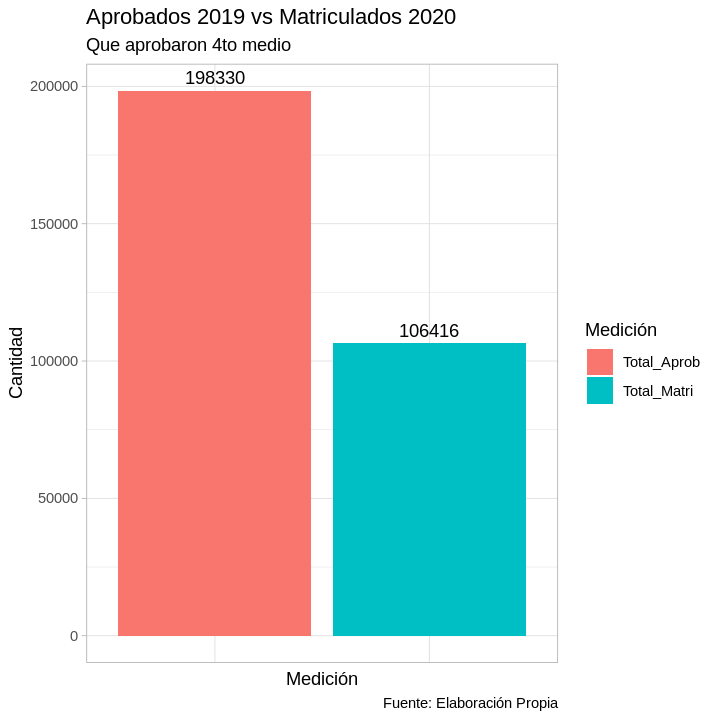

In [214]:
g1 <- ggplot(data=resumen, aes(x=Medicion,y=Cantidad,fill=Medicion)) + geom_col() +
geom_text(aes(label=Cantidad, vjust=-0.5)) +
labs(x='Medición',title='Aprobados 2019 vs Matriculados 2020', subtitle='Que aprobaron 4to medio', caption = "Fuente: Elaboración Propia") +
theme(axis.text.x = element_blank(),
      axis.ticks.x = element_blank()) +
scale_fill_discrete(name="Medición") 
g1

In [215]:
# Histograma de Promedios Generales Escolares 2019 (que aprobaron 4to medio) 
# en las Comunas de Chile, que están además en la base de Matrículas 2020
g2 <- ggplot(alumnos_por_comuna, aes(x=Prom_Apro)) + 
geom_histogram(bins = 25,fill="white",col="black") +
geom_vline(aes(xintercept = mean(Prom_Apro) - 2*sd(Prom_Apro)), col='red') +
geom_vline(aes(xintercept = mean(Prom_Apro) + 2*sd(Prom_Apro)),col='red') +
geom_text(data=alumnos_por_comuna, aes(x = mean(Prom_Apro) - 2*sd(Prom_Apro),
y = 0, hjust = 1.5,vjust = 2, label=paste("-2sd:",round(mean(Prom_Apro) - 2*sd(Prom_Apro),2)))) +
geom_text(data=alumnos_por_comuna, aes(x = mean(Prom_Apro) + 2*sd(Prom_Apro),
y = 0, hjust = -0.5,vjust = 2, label=paste("+2sd:",round(mean(Prom_Apro) + 2*sd(Prom_Apro),2)))) +
labs(y='Total', x='Promedio General', title='Distribución de Promedios Generales Escolares 2019 - Comunas Chile', subtitle = 'Alumnos que aprobaron 4to medio y se matricularon en IES', caption = "Fuente: Elaboración Propia")


In [216]:
# Histograma de Promedios de Asistencia Anual Escolares 2019 (que aprobaron 4to medio) 
# en las Comunas de Chile, que están además en la base de Matrículas 2020
g3 <- ggplot(alumnos_por_comuna, aes(x=Asis_Apro)) + 
geom_histogram(bins = 25,fill="white",col="black") +
geom_vline(aes(xintercept = mean(Asis_Apro) - 2*sd(Asis_Apro)), col='blue') +
geom_vline(aes(xintercept = mean(Asis_Apro) + 2*sd(Asis_Apro)),col='blue') +
geom_text(data=alumnos_por_comuna, aes(x = mean(Asis_Apro) - 2*sd(Asis_Apro),
y = 0, hjust = 1.5,vjust = 2, label=paste("-2sd:",round(mean(Asis_Apro) - 2*sd(Asis_Apro),2),"%"))) +
geom_text(data=alumnos_por_comuna, aes(x = mean(Asis_Apro) + 2*sd(Asis_Apro),
y = 0, hjust = -0.5,vjust = 2, label=paste("+2sd:",round(mean(Asis_Apro) + sd(Asis_Apro),2),"%"))) +
labs(y='Total', x='Promedio Asitencia Anual', title='Distribución de Promedios de Asistencia Anual Escolares 2019 - Comunas Chile', subtitle='Alumnos que aprobaron 4to medio y se matricularon en IES',caption = "Fuente: Elaboración Propia")


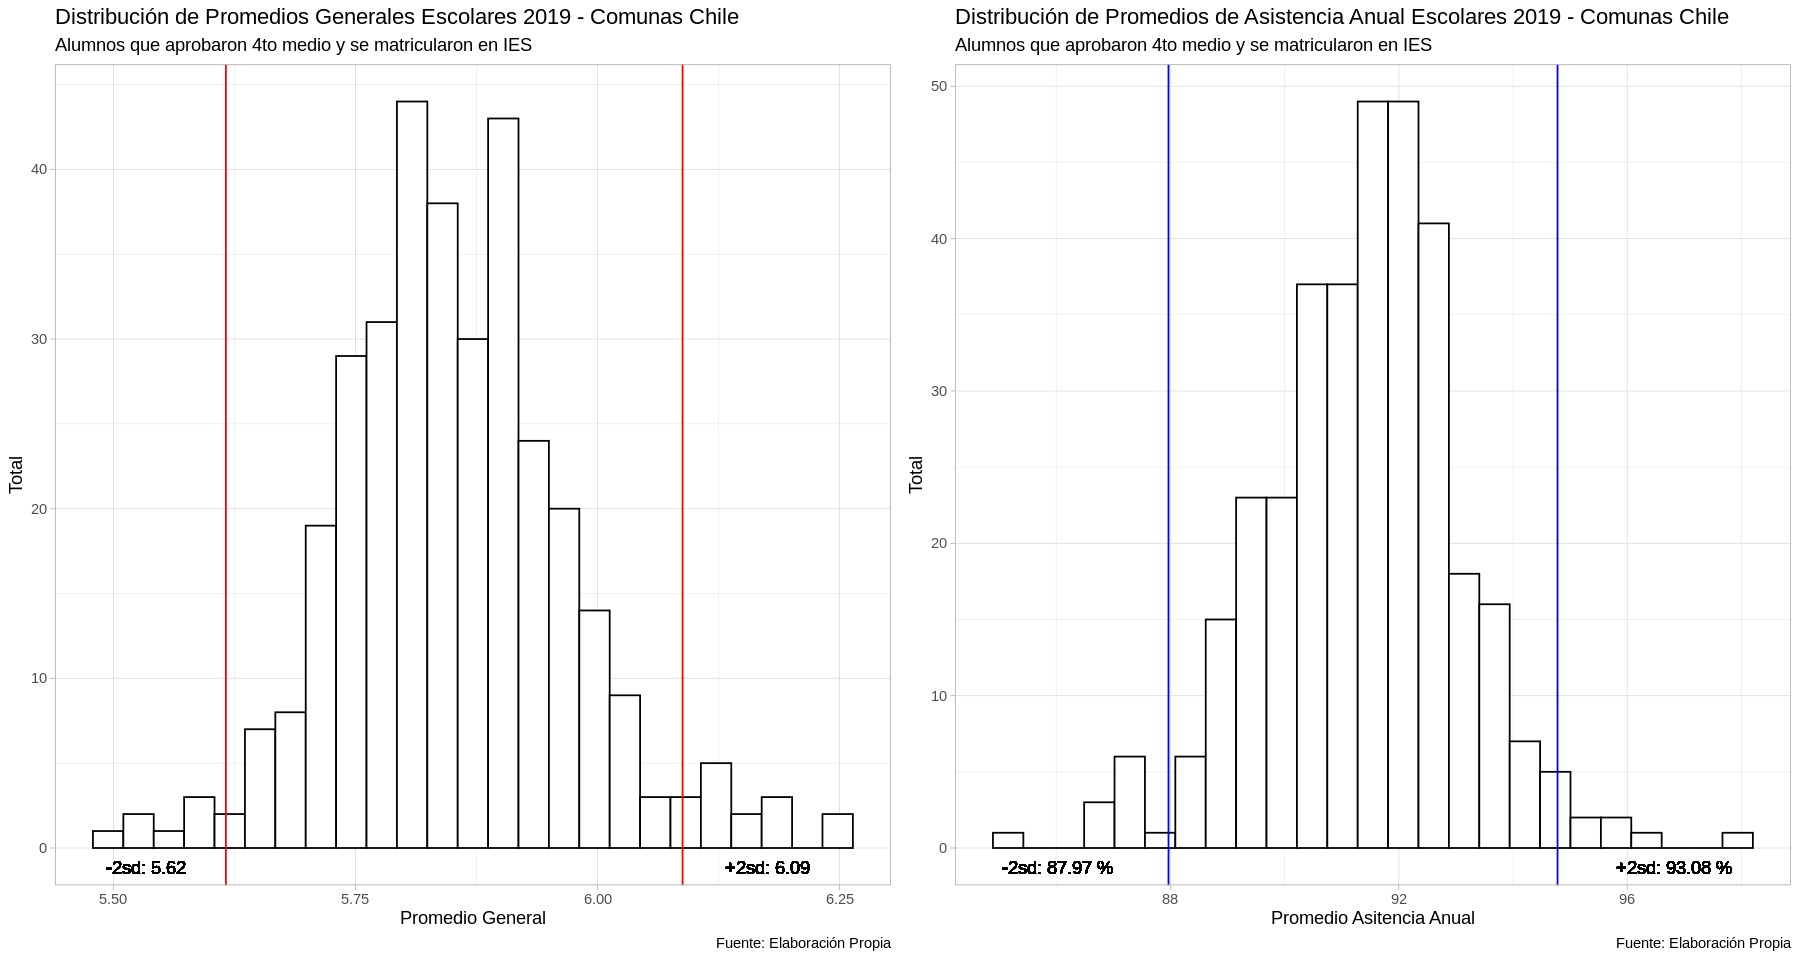

In [217]:
options(repr.plot.width = 15, repr.plot.height = 8)
# Gráfico que muestra en una misma en dos columnas los gráficos g2 y g3
g_origen_comunas <- ggarrange(g2, g3,
                    ncol = 2, nrow = 1)
g_origen_comunas

In [218]:
# Gráfico de columnas con las 20 comunas que tienen el Promedio General de
# Escolares 2019 (que aprobaron 4to medio) mas alto, y que están en la base de 
# Matrículas 2020
options(repr.plot.width = 8, repr.plot.height = 8)
g4 <- ggplot(alumnos_por_comuna %>% arrange(desc(Prom_Apro)) %>% slice(1:20), aes(x=reorder(NOM_COM_ALU,Prom_Apro),y=Prom_Apro)) + 
geom_col(fill="gray", color="#3B8D35") +
geom_text(aes(label=round(Prom_Apro,2), hjust=1.5)) +
labs(y='Promedio General', x='Comuna', title='Comunas de Chile con Promedios Generales Escolares 2019 mas Altos', subtitle='Alumnos que aprobaron 4to medio y que se matricularon en IES',caption = "Fuente: Elaboración Propia") +
coord_flip()

In [219]:
# Gráfico de columnas con las 20 comunas que tienen el Promedio General de
# Escolares 2019 (que aprobaron 4to medio) mas bajo, y que están en la base de 
# Matrículas 2020
g5 <- ggplot(alumnos_por_comuna %>% arrange(Prom_Apro) %>% slice(1:20), aes(x=reorder(NOM_COM_ALU,-Prom_Apro),y=Prom_Apro)) + 
geom_col(fill="gray", color="red") +
geom_text(aes(label=round(Prom_Apro,2), hjust=1.5)) +
labs(y='Promedio General', x='Comuna', title='Comunas de Chile con Promedios Generales Escolares 2019 mas Bajos', subtitle='Alumnos que aprobaron 4to medio y que se matricularon en IES',caption = "Fuente: Elaboración Propia") +
coord_flip()

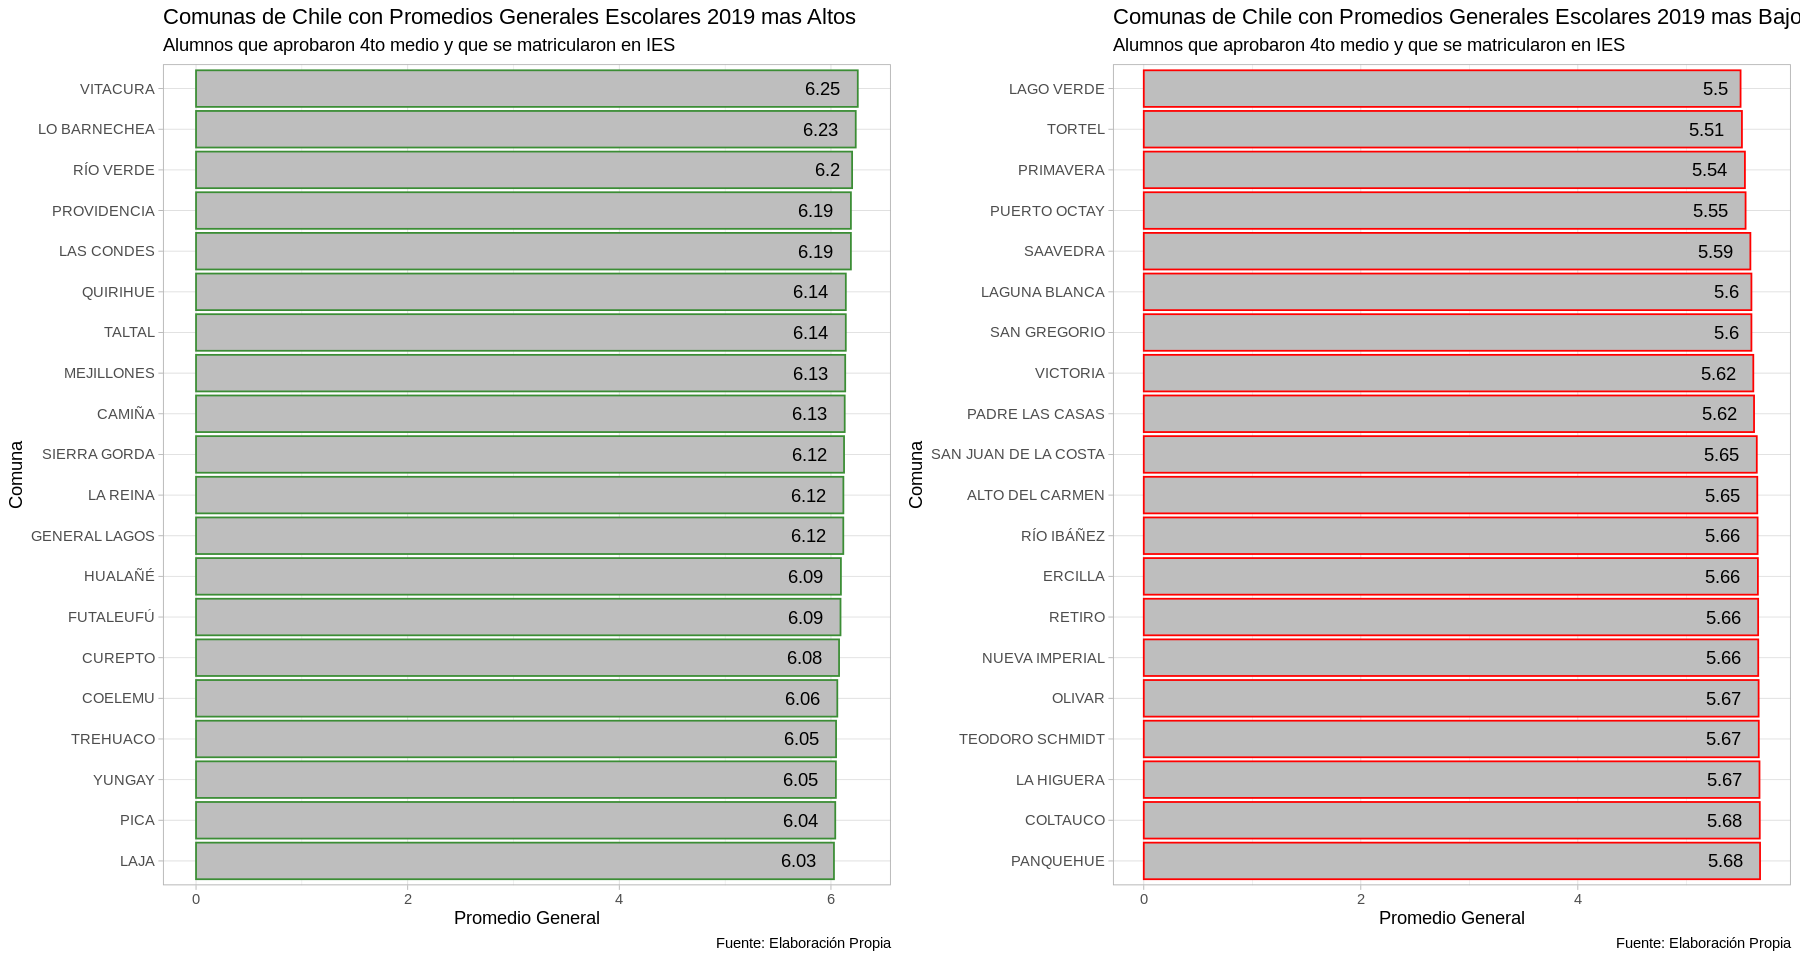

In [220]:
options(repr.plot.width = 15, repr.plot.height = 8)
g_origen_comuna_20 <- ggarrange(g4, g5,
                    ncol = 2, nrow = 1)
g_origen_comuna_20

In [221]:
alumnos_por_tipo_colegio <- alumnos_por_tipo_colegio %>% mutate(NOM_DEPE2 = case_when(COD_DEPE2 == 1 ~ 'Municipal',
                                                          COD_DEPE2 == 2 ~ 'Particular Subvencionado',
                                                          COD_DEPE2 == 3 ~ 'Particular Pagado (o no subvencionado)',
                                                          COD_DEPE2 == 4 ~ 'Corporación de Administración Delegada (DL 3166)',
                                                          COD_DEPE2 == 5 ~ 'Servicio Local de Educación'))

In [222]:
alumnos_por_tipo_colegio

COD_DEPE2,Cant_Apro,Cant_Matr,Prom_Apro,Asis_Apro,NOM_DEPE2
<int>,<int>,<int>,<dbl>,<dbl>,<chr>
5,5486,2633,5.765567,89.61815,Servicio Local de Educación
4,9636,4246,5.701410,89.64500,Corporación de Administración Delegada (DL 3166)
3,20510,15077,6.231634,92.07081,Particular Pagado (o no subvencionado)
1,63217,30210,5.811233,89.61911,Municipal
2,99481,54250,5.836805,91.57540,Particular Subvencionado


In [223]:
# Gráfico de columnas con el Promedio General de los alumnos de la base 
# Rendimientos Escolares 2019 (que aprobaron 4to medio), que además están en la
# base de Matrículas 2020, por tipo de establecimiento (dependencia)
prom <- round(mean(alumnos_por_tipo_colegio$Prom_Apro),2)
g6 <- ggplot(data=alumnos_por_tipo_colegio, aes(x=NOM_DEPE2,y=Prom_Apro)) + 
geom_col(aes(fill=NOM_DEPE2)) + 
geom_hline(aes(yintercept = prom)) +
geom_text(aes(4.5, prom, label = paste("Promedio:",prom), vjust = - 1)) +
theme(axis.text.x = element_blank(),
      axis.ticks.x = element_blank()) +
scale_fill_discrete(name="") +
labs(x='Dependencia', y='Promedio General', title='Promedio General por Dependencia', subtitle='2019', caption = "Fuente: Elaboración Propia") 


In [224]:
# Gráfico de columnas con el Promedio de Asistencia Anual de los alumnos de la base 
# Rendimientos Escolares 2019 (que aprobaron 4to medio), que además están en la
# base de Matrículas 2020, por tipo de establecimiento (dependencia)
prom_asis <- round(mean(alumnos_por_tipo_colegio$Asis_Apro),2)
g7 <- ggplot(data=alumnos_por_tipo_colegio, aes(x=NOM_DEPE2,y=Asis_Apro)) + 
geom_col(aes(fill=NOM_DEPE2)) + 
geom_hline(aes(yintercept = prom_asis)) +
geom_text(aes(4.5, prom_asis, label = paste("Promedio:",prom_asis,"%"), vjust = - 1)) +
theme(axis.text.x = element_blank(),
      axis.ticks.x = element_blank()) +
scale_fill_discrete(name="") +
labs(x='Dependencia', y='Promedio Asistencia Anual', title='Promedio Asistencia Anual por Dependencia', subtitle='2019', caption = "Fuente: Elaboración Propia") 


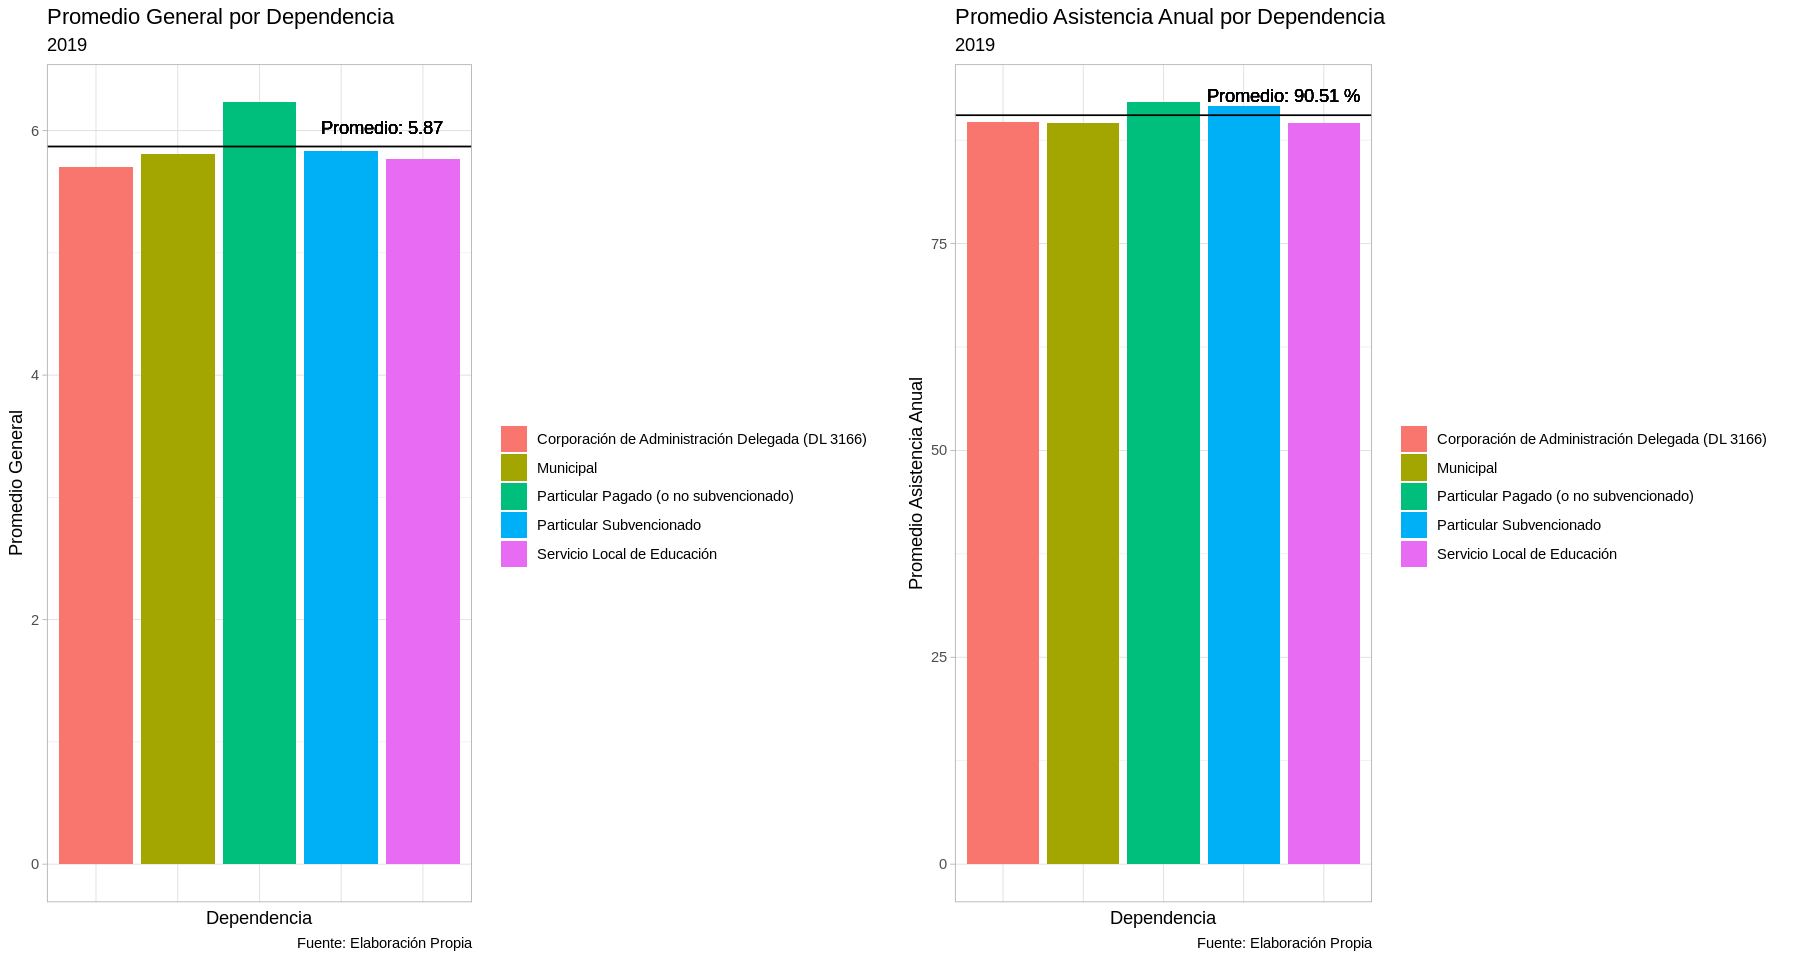

In [225]:
options(repr.plot.width = 15, repr.plot.height = 8)
g_origen_tipo_colegio <- ggarrange(g6, g7,
                    ncol = 2, nrow = 1)
g_origen_tipo_colegio

In [226]:
# Gráfico de columnas con el Promedio General de los alumnos de la base de
# Rendimientos Escolares 2019 (que aprobaron 4to medio), que además están en la
# base de Matrículas 2020, por tipo de IES en la que se matricularon.
prom_gnral <- round(mean(alumnos_por_tipo_ies$Prom_Apro),2)
g8 <- ggplot(data=alumnos_por_tipo_ies %>% filter(!is.na(alumnos_por_tipo_ies)), aes(x=tipo_inst_1,y=Prom_Apro)) + 
geom_col(aes(fill=tipo_inst_1)) + 
geom_hline(aes(yintercept = prom_gnral)) +
geom_text(aes(2.5, prom_gnral, label = paste("Promedio:",prom_gnral), vjust = - 0.5)) +
theme(axis.text.x = element_blank(),
      axis.ticks.x = element_blank()) +
scale_fill_discrete(name="") +
labs(x='Tipo IES', y='Promedio General', title='Promedio General por Tipo IES', subtitle='2019', caption = "Fuente: Elaboración Propia") 


In [227]:
# Gráfico de columnas con el Promedio de Asistencia Anual de los alumnos de la 
# base de Rendimientos Escolares 2019 (que aprobaron 4to medio), que además 
# están en la base de Matrículas 2020, por tipo de IES en la que se matricularon.
prom_asis_2 <- round(mean(alumnos_por_tipo_ies$Asis_Apro),2)
g9 <- ggplot(data=alumnos_por_tipo_ies %>% filter(!is.na(alumnos_por_tipo_ies)), aes(x=tipo_inst_1,y=Asis_Apro)) + 
geom_col(aes(fill=tipo_inst_1)) + 
geom_hline(aes(yintercept = prom_asis_2)) +
geom_text(aes(2.5, prom_asis_2, label = paste("Promedio:",prom_asis_2,"%"), vjust = - 0.5)) +
theme(axis.text.x = element_blank(),
      axis.ticks.x = element_blank()) +
scale_fill_discrete(name="") +
labs(x='Tipo IES', y='Promedio Asistencia Anual', title='Promedio Asistencia Anual por Tipo IES', subtitle='2019', caption = "Fuente: Elaboración Propia") 


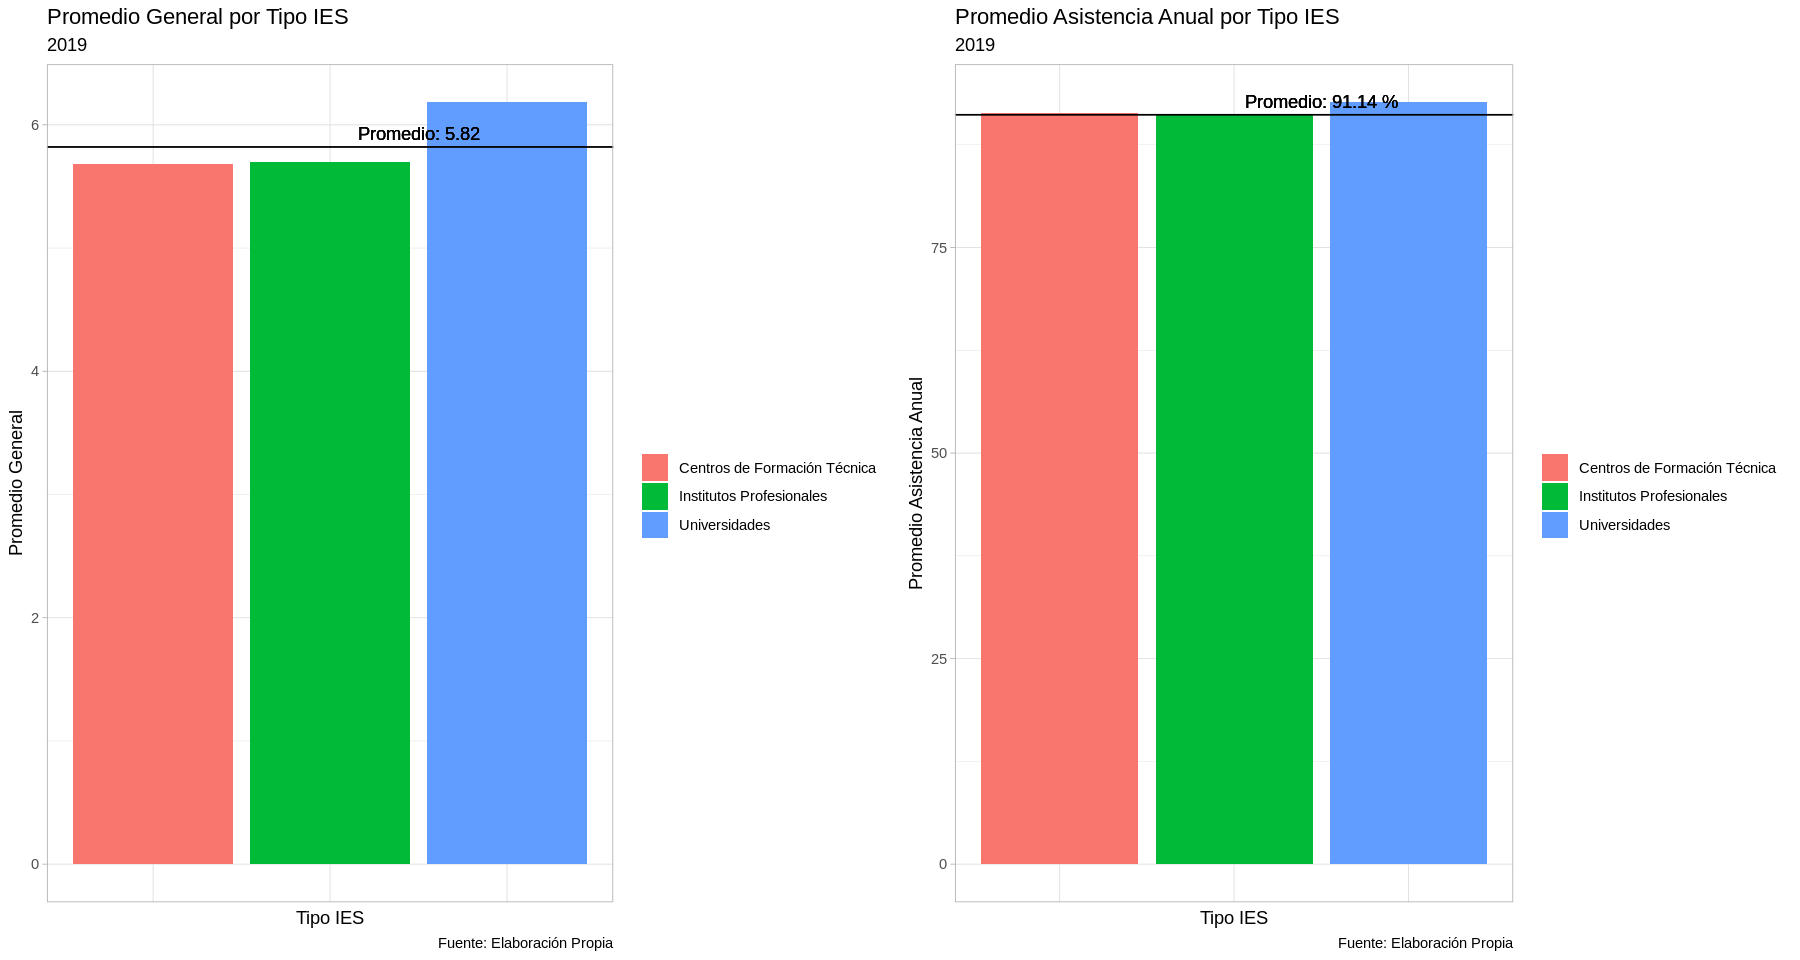

In [228]:
options(repr.plot.width = 15, repr.plot.height = 8)
g_origen_tipo_ies <- ggarrange(g8, g9,
                    ncol = 2, nrow = 1)
g_origen_tipo_ies

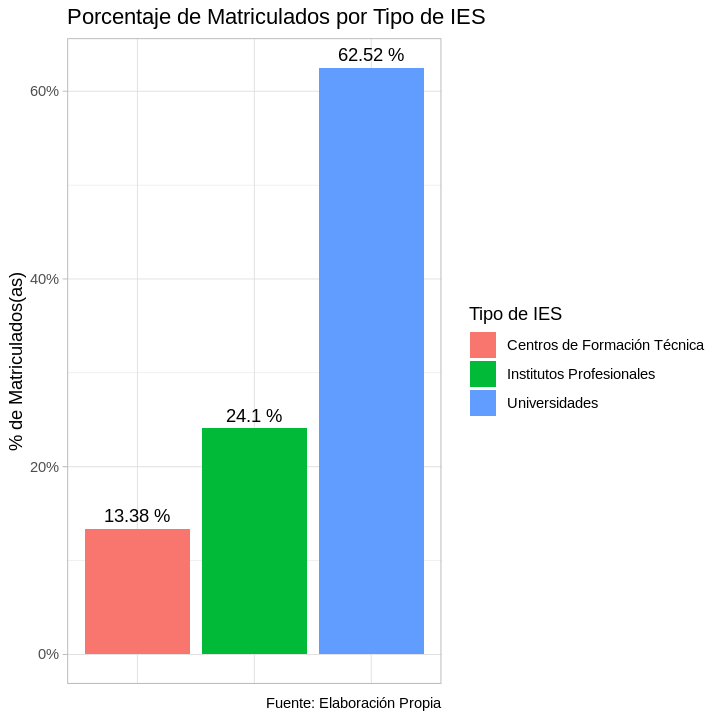

In [229]:
# Gráfico de columnas con el % de alumnos en base de Matriculados 2020, 
# por tipo de IES en la que se matricularon, que aprobaron 4to medio en la base 
# de Rendimientos Escolares 2019.
options(repr.plot.width = 6, repr.plot.height = 6)
g10 <- ggplot(alumnos_por_tipo_ies %>% filter(!is.na(alumnos_por_tipo_ies)), aes(x=tipo_inst_1,y=Cant_Matr*1.0/sum(Cant_Matr))) + 
geom_col(aes(fill=tipo_inst_1)) + 
labs(x='Tipo de IES', y='% de Matriculados(as)', title='Porcentaje de Matriculados por Tipo de IES', caption = "Fuente: Elaboración Propia") +
geom_text(aes(label=paste(round(Cant_Matr*100.0/sum(Cant_Matr),2),"%"), vjust=-0.5)) +
theme(axis.title.x = element_blank(),
      axis.text.x = element_blank(),
      axis.ticks.x = element_blank()) +
scale_fill_discrete(name="Tipo de IES") +
scale_y_continuous(labels = scales::percent_format(accuracy = 1))
g10

*   **Conclusión**

A partir de las consultas ejecutadas y los gráficos construídos es posible concluir que solo un 54% de los alumnos que aprobaron 4to medio en la base Rendimiento 2019 se encuentran en la base de Matrícula de IES del 2020. 

Sobre el origen de los alumnos en base Matrícula 2020 que aprobaron 4to medio en la base 2019, se analizaron los promedios generales por tipo de colegio (dependencia) y por comuna. En relación con la dependencia, los particulares pagados tuvieron en promedio las nota mas alta (6.23), seguidos por los particulares no subvencionados (5.84), y los municipales (5.81). En relación con las comunas, el 95% de los promedios (siguiendo la regla empírica de la curva normal) se encuentran en el intervalo [5.62, 6.09]. Entre las comunas con promedios más altos están Vitacura, Lo Barnechea, Río Verde, Providencia, y Las Condes. Con los promedios mas bajos están las comunas Lago Verde, Tortel, Primavera, Puerto Octay, Saavedra.

Sobre el "destino" de los alumnos en base Matrícula 2020 que aprobaron 4to medio en la base 2019, se calculó la proporción de alumnos y los promedios generales por tipo de IES. El 13.38% de alumnos se matricularon en Centros de Formación Técnica, el 24.1% en Institutos Profesionales, y el 62.52% en Universidades. En cuanto a los promedios, como esperado, las universidades recibieron los alumnos con promedios mas altos (6.18), seguido de los Institutos Profesionales (5.70) y los Centros de Formación Técnica (5.68).

Finalmente, con base en los cálculos y gráficos, puede decirse que el tipo de IES en el cual los alumnos se matriculan está relacionado con el promedio general al finalizar cuarto medio, que a su vez parece estar vinculado con la comuna de residencia del alumno y el tipo de colegio (dependencia) del que se gradúan. Sin embargo, sería necesario analizar en el tiempo esta hipótesis, además de un análisis causal para poder establecer con certeza ésto.

